Nom & prénoms: Jacques N'guessan

Status: Statisticien et étudiant en Master en Statistiques & Data science

Institution: Une entreprise ivoirienne de la place et l'Université SOUMARE

# Projet : Analyse Statistique et Visualisation des Prix des Produits Vivriers en Côte d'Ivoire en 2016

## Introduction

Ce projet vise à démontrer diverses techniques de manipulation de données ainsi que des analyses statistiques descriptives et des visualisations des prix des produits vivriers en Côte d'Ivoire en 2016.
Dans ce notebook, nous nous intéresserons majoritairement, sinon exclusivement aux prix au détail pour les analyses.

**Importation des bibliothèques

In [124]:
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import seaborn as sns
import math 

** Importation de la base de données : Source(https://data.gouv.ci/datasets/mise-a-jour-des-prix-de-gros-et-au-details-sur-certains-marches-en-2016)

In [125]:
df = pd.read_excel("df.xlsx")
df

ANNEE     MOIS                         PRODUITS  COMMUNES  \
0      2016     Août                   Noix de karité     Abobo   
1      2016     Août  Arachide décortiquée gros grain     Abobo   
2      2016     Août                Aubergine N'drowa     Abobo   
3      2016     Août                           Avocat     Abobo   
4      2016     Août                  Banane plantain     Abobo   
...     ...      ...                              ...       ...   
3707   2016  Octobre                Riz local blanchi  Yopougon   
3708   2016  Octobre                             Soja  Yopougon   
3709   2016  Octobre                     Sorgho blanc  Yopougon   
3710   2016  Octobre                   Tomate à côtes  Yopougon   
3711   2016  Octobre                   Tomate Sodefel  Yopougon   

           CATEGORIE SOUS-CATEGORIE     MONTANT  
0       Prix en gros            AS1         NaN  
1       Prix en gros            AS1  650.000000  
2       Prix en gros            AS1  133.333333  
3       Prix en gros            AS1         NaN  
4       Prix en gros            AS1  366.666667  
...              ...            ...         ...  
3707  Prix au détail            AS4  400.000000  
3708  Prix au détail            AS4  600.000000  
3709  Prix au détail            AS4  400.000000  
3710  Prix au détail            AS4  396.700952  
3711  Prix au détail            AS4  650.000000  

[3712 rows x 7 columns]

**informations sommaires

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712 entries, 0 to 3711
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ANNEE           3712 non-null   int64  
 1   MOIS            3712 non-null   object 
 2   PRODUITS        3712 non-null   object 
 3   COMMUNES        3712 non-null   object 
 4   CATEGORIE       3712 non-null   object 
 5   SOUS-CATEGORIE  3712 non-null   object 
 6   MONTANT         2361 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 203.1+ KB


## I- Visualisation, analyse et gestion des valeurs manquantes

### 1.a-Concentration des valeurs manquantes 

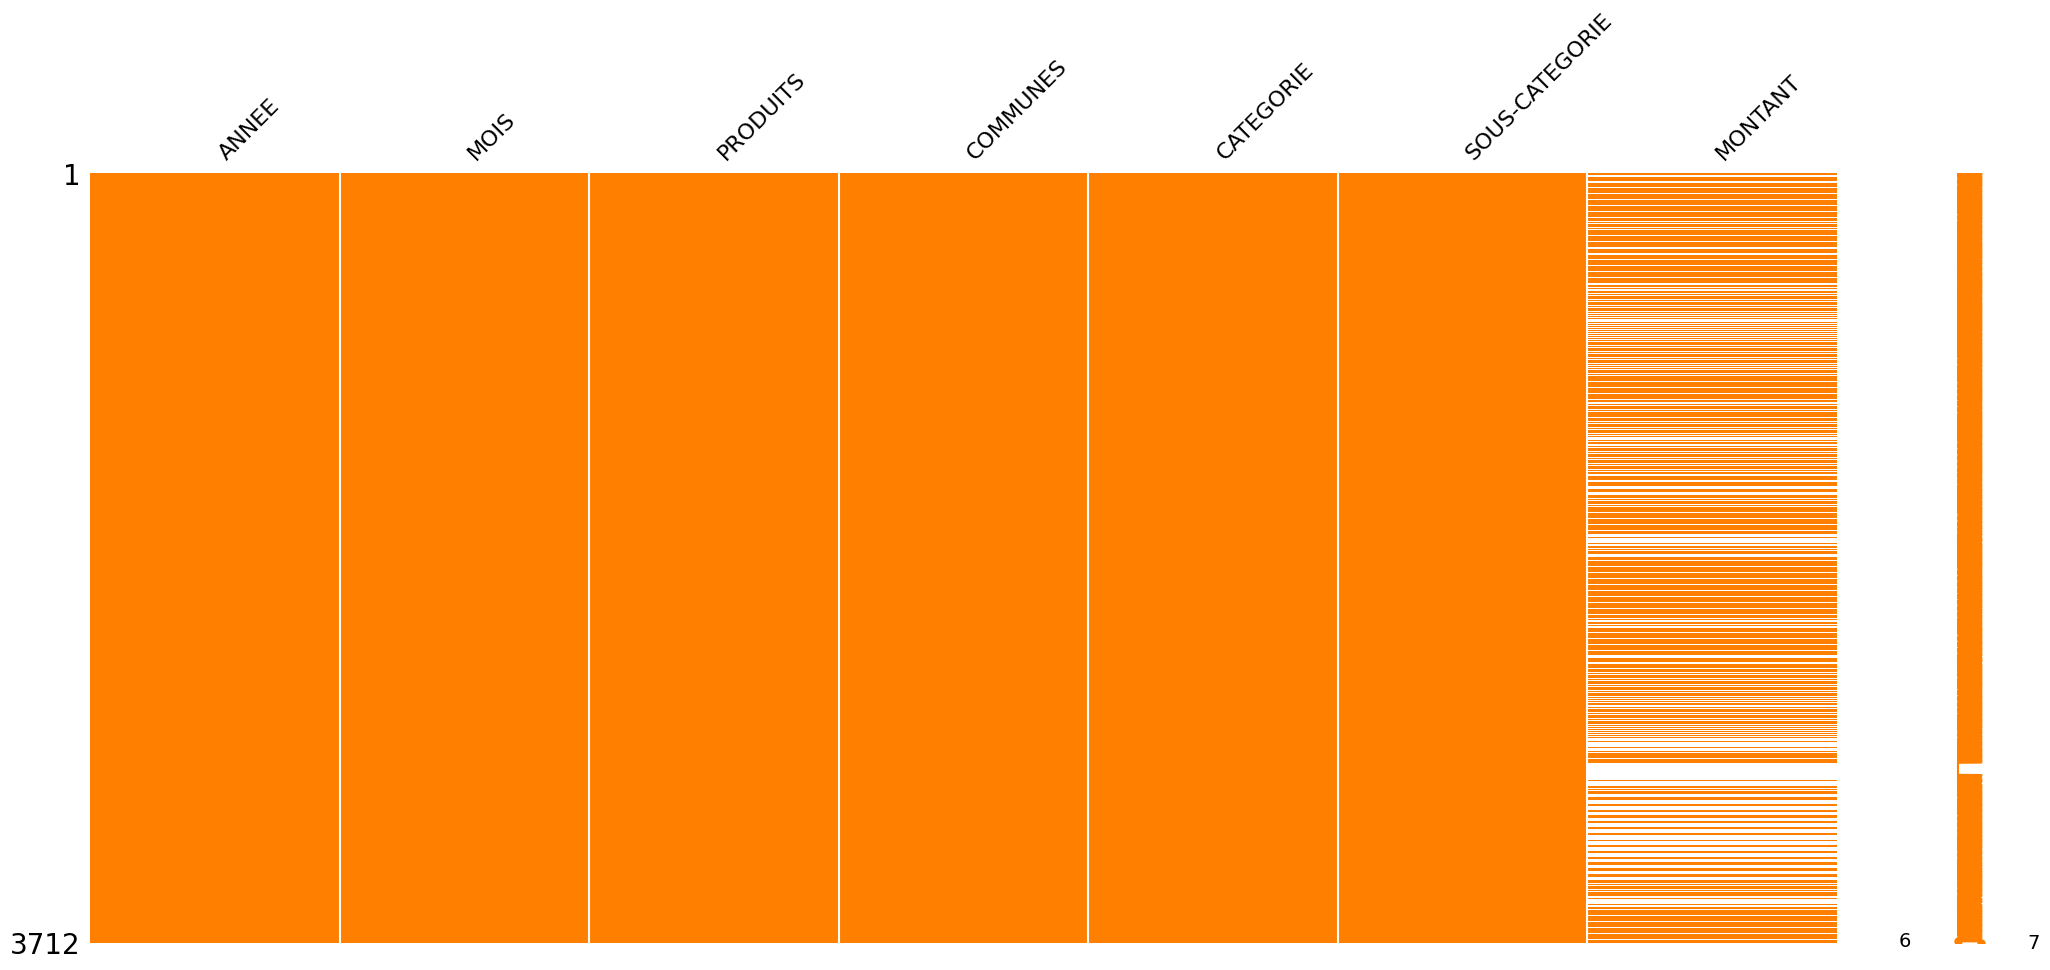

In [127]:
msno.matrix(df,color=(1, 0.5, 0))
plt.show()

 D'après ce graphique, on constate que seule la variable "Montant" présente des valeurs manquantes. Les espaces blancs indiquent clairement la position et la concentration de ces valeurs manquantes dans le jeu de données.

### 1.b- Proportions de manquants  et Nombre d'oservations par variables 

In [128]:
Variables =  df.columns
nombre_de_manquant = 0
p_de_manquant =0
pourcentage = "%"
liste1 = []
ligne_manquant=[]
for i in range(df.shape[1]):
    for j in range(df.shape[0]):
        if pd.isna(df.iloc[j,i]) or df.iloc[j,i]=="":
            ligne_manquant.append(j)
            nombre_de_manquant = nombre_de_manquant+1
            p_de_manquant = (nombre_de_manquant*(100))/(df.shape[0])
            p_de_manquant = round(p_de_manquant,2)      
    liste1.append(p_de_manquant)
    nombre_de_manquant = 0
p= pd.DataFrame({"Variables": Variables,
                "Proportion en % de valeur manquantes" : liste1
})
print("* Proportion de valeur manquantes par variables")
p

* Proportion de valeur manquantes par variables


Variables  Proportion en % de valeur manquantes
0           ANNEE                                   0.0
1            MOIS                                   0.0
2        PRODUITS                                   0.0
3        COMMUNES                                   0.0
4       CATEGORIE                                   0.0
5  SOUS-CATEGORIE                                   0.0
6         MONTANT                                  36.4


 * Nombre d'oservation par variables


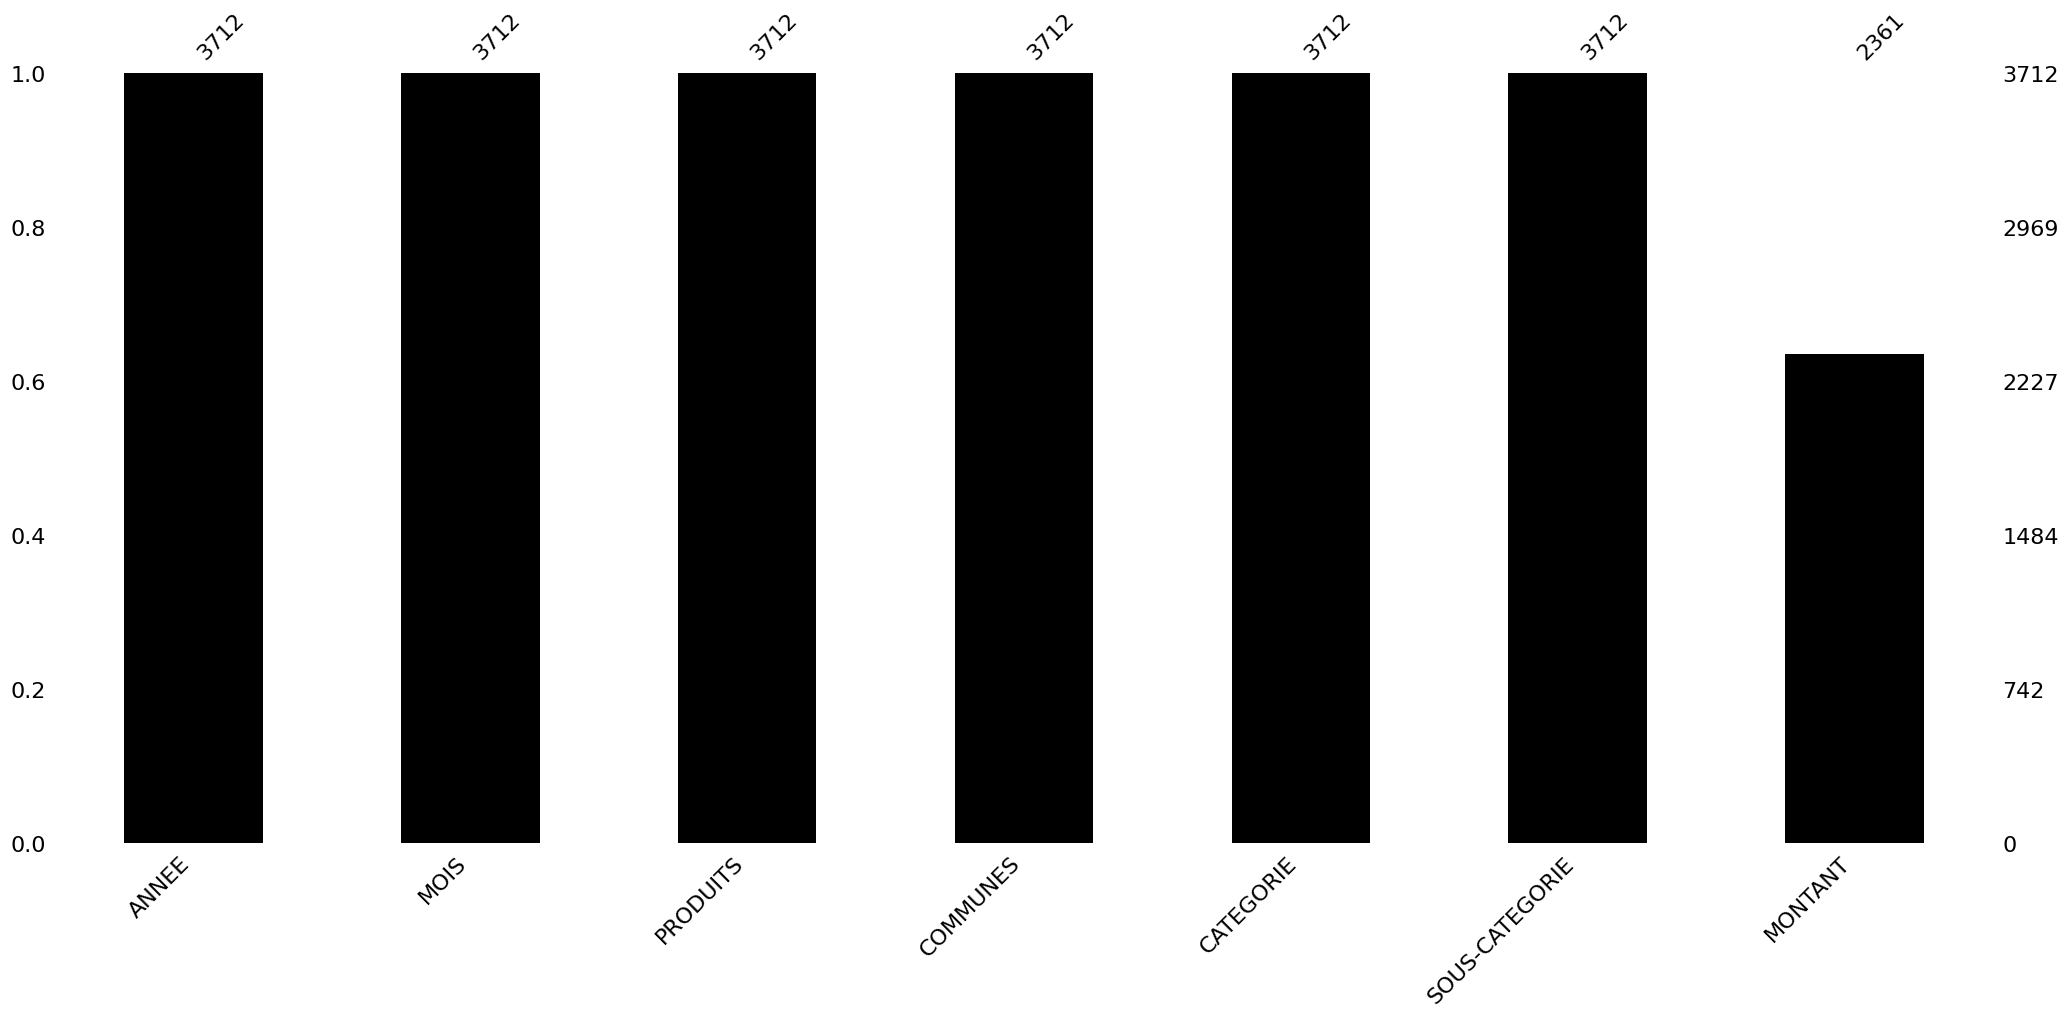

In [129]:
print("\n * Nombre d'oservation par variables")
msno.bar(df,color="black")
plt.show()

Par mesure de sûreté, comme approche,  nous decidons de tout simplement supprimer  les lignes ayants des valeurs manquantes.

###  La base de données nettoyée

In [130]:
Donnees = df.drop(index=ligne_manquant).copy()

### 1.c- Concentration des valeurs manquantes sur notre nouvelle base :

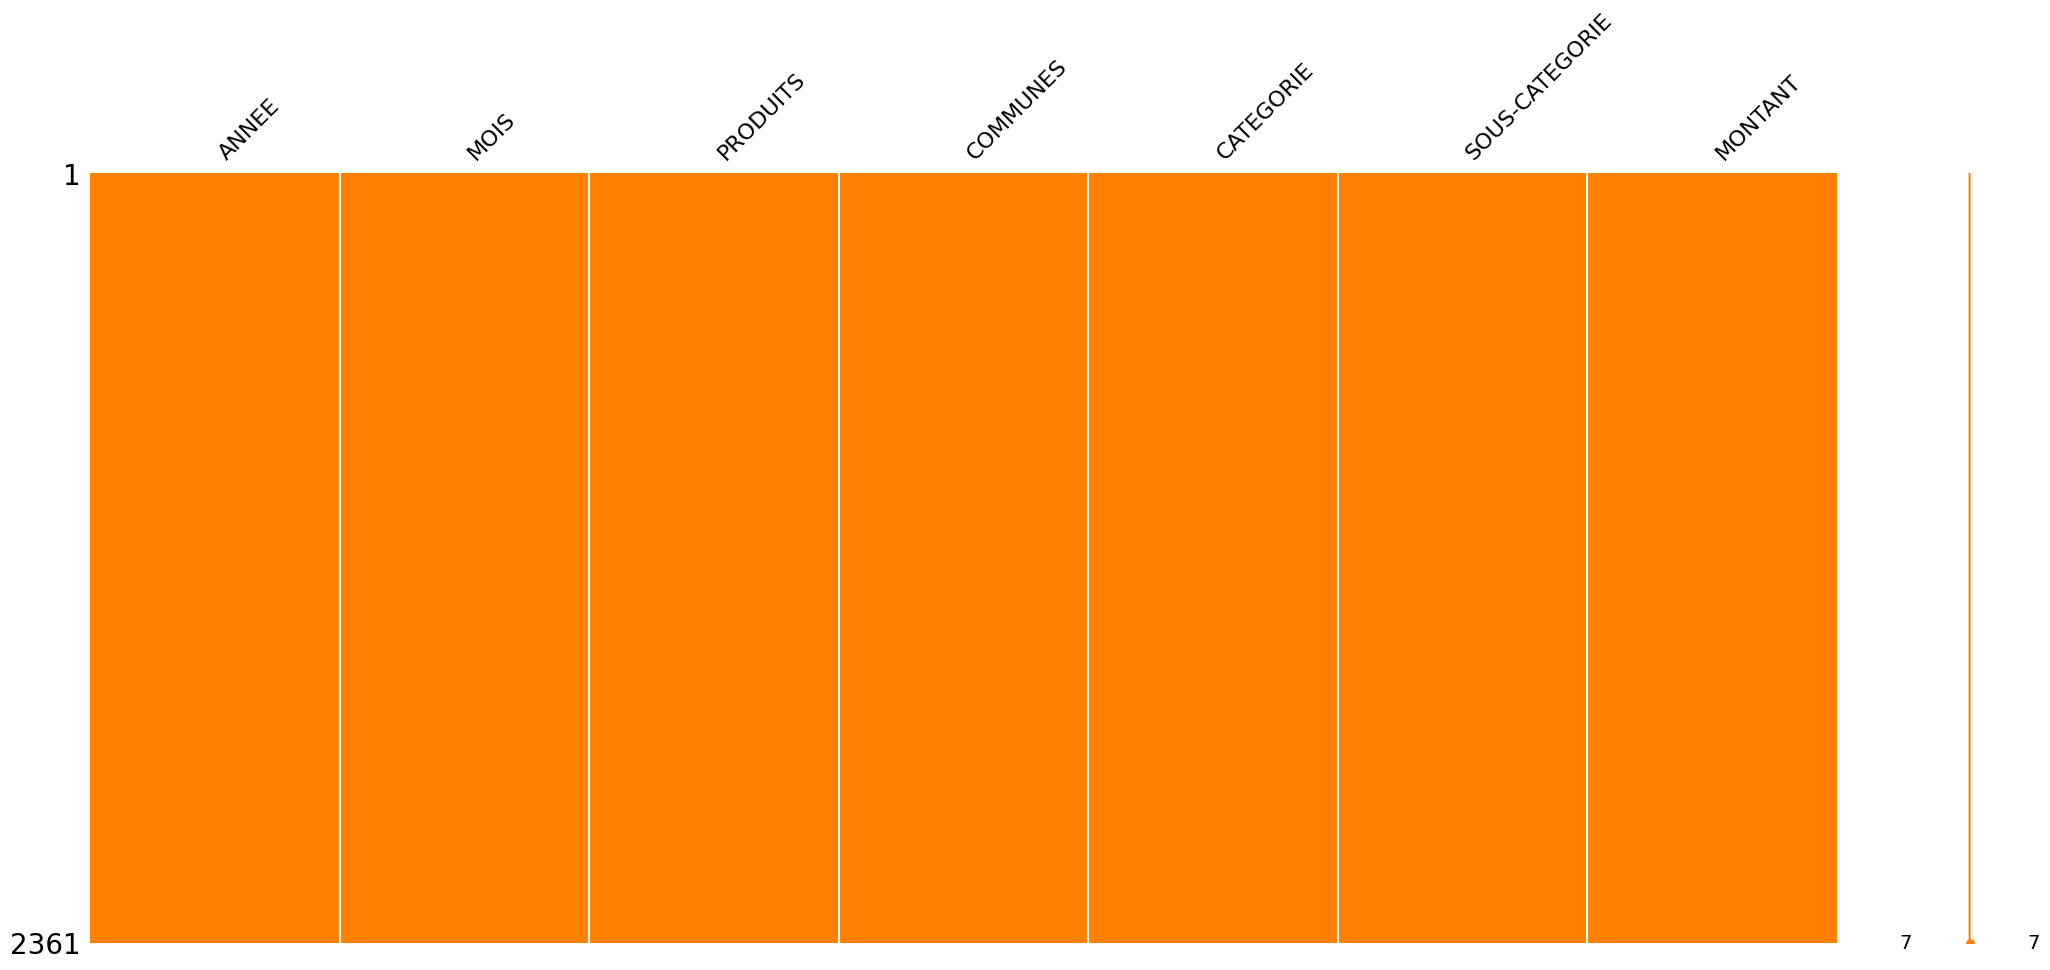

In [131]:
msno.matrix(Donnees,color=(1,0.5,0))
plt.show()

## II- Structuration, partitionnement et organisation des données 

Dans cette section, comme son nom l'indique, nous allons partitionner nos données. En effet, la base de données contient l'évolution des prix des produits vivriers en gros et au détail. Nous allons commencer à partitionner nos données pour une analyse distincte des deux catégories de prix.

On cree un dictionaire dans lequel on stock nos sous matrice de données.

In [132]:
categorie = Donnees["CATEGORIE"].unique()
Dic_partition = {}
for cat in categorie:
    df_cat = Donnees.loc[Donnees["CATEGORIE"]==cat].copy()
    Dic_partition[cat] = df_cat

### 2.a-Sous base 1 : Prix en gros

In [133]:
df_prix_en_gros = Dic_partition["Prix en gros"]
df_prix_en_gros 

ANNEE     MOIS                         PRODUITS  COMMUNES     CATEGORIE  \
1      2016     Août  Arachide décortiquée gros grain     Abobo  Prix en gros   
2      2016     Août                Aubergine N'drowa     Abobo  Prix en gros   
4      2016     Août                  Banane plantain     Abobo  Prix en gros   
5      2016     Août                      Citron vert     Abobo  Prix en gros   
6      2016     Août                      Gombo frais     Abobo  Prix en gros   
...     ...      ...                              ...       ...           ...   
3678   2016  Octobre                Riz local blanchi  Yopougon  Prix en gros   
3679   2016  Octobre                             Soja  Yopougon  Prix en gros   
3680   2016  Octobre                     Sorgho blanc  Yopougon  Prix en gros   
3681   2016  Octobre                   Tomate à côtes  Yopougon  Prix en gros   
3682   2016  Octobre                   Tomate Sodefel  Yopougon  Prix en gros   

     SOUS-CATEGORIE     MONTANT  
1               AS1  650.000000  
2               AS1  133.333333  
4               AS1  366.666667  
5               AS1  160.000000  
6               AS1  216.666667  
...             ...         ...  
3678            AS4  340.000000  
3679            AS4  500.000000  
3680            AS4  300.000000  
3681            AS4  125.000000  
3682            AS4  500.000000  

[1176 rows x 7 columns]

### 2.b-Sous base 2 : Prix au détail

In [134]:
df_prix_au_detail = Dic_partition["Prix au détail"]
df_prix_au_detail

ANNEE     MOIS                         PRODUITS  COMMUNES  \
30     2016     Août  Arachide décortiquée gros grain     Abobo   
31     2016     Août                Aubergine N'drowa     Abobo   
32     2016     Août                           Avocat     Abobo   
33     2016     Août                  Banane plantain     Abobo   
34     2016     Août                      Citron vert     Abobo   
...     ...      ...                              ...       ...   
3707   2016  Octobre                Riz local blanchi  Yopougon   
3708   2016  Octobre                             Soja  Yopougon   
3709   2016  Octobre                     Sorgho blanc  Yopougon   
3710   2016  Octobre                   Tomate à côtes  Yopougon   
3711   2016  Octobre                   Tomate Sodefel  Yopougon   

           CATEGORIE SOUS-CATEGORIE     MONTANT  
30    Prix au détail            AS1  800.000000  
31    Prix au détail            AS1  276.282051  
32    Prix au détail            AS1  563.492063  
33    Prix au détail            AS1  628.801584  
34    Prix au détail            AS1  200.000000  
...              ...            ...         ...  
3707  Prix au détail            AS4  400.000000  
3708  Prix au détail            AS4  600.000000  
3709  Prix au détail            AS4  400.000000  
3710  Prix au détail            AS4  396.700952  
3711  Prix au détail            AS4  650.000000  

[1185 rows x 7 columns]

## III-Statistiques descriptives et visualisations

### 3.a- Statistiques et visualisations matrices de prix au détail

#### 3.a.1-Statistiques descriptives

Dans cette section nous allons determiner quelques statistiques afin de mieux comprendre nos données.

#### 3.a.1.1 - Prix moyen des produits par commmunes

In [135]:
prix_moyen_par_commune= df_prix_au_detail.groupby(
    ["COMMUNES", "PRODUITS", "SOUS-CATEGORIE"]
)["MONTANT"].agg(PRIX_MOYEN_PAR_COMMUNES="mean",
                 MEDIANE= "median",
                 PRIX_MAX = "max",
                 PRIX_MIN = "min"
                 ).reset_index()
prix_moyen_par_commune["PRODUITS_SPE"]= prix_moyen_par_commune["PRODUITS"]+" "+prix_moyen_par_commune["SOUS-CATEGORIE"]
prix_moyen_par_commune

COMMUNES                         PRODUITS SOUS-CATEGORIE  \
0       Abobo  Arachide décortiquée gros grain            AS1   
1       Abobo  Arachide décortiquée gros grain            AS2   
2       Abobo  Arachide décortiquée gros grain            AS3   
3       Abobo  Arachide décortiquée gros grain            AS4   
4       Abobo                Aubergine N'drowa            AS1   
..        ...                              ...            ...   
773  Yopougon                   Tomate Sodefel            AS4   
774  Yopougon                   Tomate à côtes            AS1   
775  Yopougon                   Tomate à côtes            AS2   
776  Yopougon                   Tomate à côtes            AS3   
777  Yopougon                   Tomate à côtes            AS4   

     PRIX_MOYEN_PAR_COMMUNES     MEDIANE    PRIX_MAX    PRIX_MIN  \
0                 766.666667  800.000000  800.000000  700.000000   
1                 750.000000  750.000000  800.000000  700.000000   
2                 733.333333  750.000000  800.000000  650.000000   
3                 800.000000  800.000000  850.000000  750.000000   
4                 285.252340  276.282051  317.981199  261.493769   
..                       ...         ...         ...         ...   
773               466.666667  450.000000  650.000000  300.000000   
774               357.222486  353.098543  405.572100  312.996816   
775               365.625554  330.691470  439.826106  326.359085   
776               349.160819  366.217724  459.830867  221.433868   
777               340.745308  312.996816  396.700952  312.538156   

                            PRODUITS_SPE  
0    Arachide décortiquée gros grain AS1  
1    Arachide décortiquée gros grain AS2  
2    Arachide décortiquée gros grain AS3  
3    Arachide décortiquée gros grain AS4  
4                  Aubergine N'drowa AS1  
..                                   ...  
773                   Tomate Sodefel AS4  
774                   Tomate à côtes AS1  
775                   Tomate à côtes AS2  
776                   Tomate à côtes AS3  
777                   Tomate à côtes AS4  

[778 rows x 8 columns]

#### 3.a.1.2 - Prix moyen des produits par mois

In [136]:
prix_moyen_par_mois = df_prix_au_detail.groupby(
    ["MOIS", "PRODUITS", "SOUS-CATEGORIE"]
)["MONTANT"].agg(PRIX_MOYEN_PAR_MOIS="mean",
                 MEDIANE= "median",
                 PRIX_MAX = "max",
                 PRIX_MIN = "min"
                 ).reset_index().reset_index()
prix_moyen_par_mois["PRODUITS_SPE"] = prix_moyen_par_mois["PRODUITS"]+" "+prix_moyen_par_mois["SOUS-CATEGORIE"]
prix_moyen_par_mois

index       MOIS                         PRODUITS SOUS-CATEGORIE  \
0        0       Août  Arachide décortiquée gros grain            AS1   
1        1       Août  Arachide décortiquée gros grain            AS2   
2        2       Août  Arachide décortiquée gros grain            AS3   
3        3       Août  Arachide décortiquée gros grain            AS4   
4        4       Août                Aubergine N'drowa            AS1   
..     ...        ...                              ...            ...   
258    258  Septembre                   Tomate Sodefel            AS4   
259    259  Septembre                   Tomate à côtes            AS1   
260    260  Septembre                   Tomate à côtes            AS2   
261    261  Septembre                   Tomate à côtes            AS3   
262    262  Septembre                   Tomate à côtes            AS4   

     PRIX_MOYEN_PAR_MOIS     MEDIANE    PRIX_MAX    PRIX_MIN  \
0             800.000000  800.000000  800.000000  800.000000   
1             750.000000  750.000000  800.000000  700.000000   
2             733.333333  750.000000  800.000000  650.000000   
3             825.000000  825.000000  850.000000  800.000000   
4             296.932999  276.282051  345.854812  268.662134   
..                   ...         ...         ...         ...   
258           350.000000  350.000000  450.000000  250.000000   
259           464.086450  436.850649  549.836601  405.572100   
260           374.591641  326.359085  527.046784  270.369053   
261           348.187833  266.714083  556.415549  221.433868   
262           388.142711  312.996816  607.456289  243.975029   

                            PRODUITS_SPE  
0    Arachide décortiquée gros grain AS1  
1    Arachide décortiquée gros grain AS2  
2    Arachide décortiquée gros grain AS3  
3    Arachide décortiquée gros grain AS4  
4                  Aubergine N'drowa AS1  
..                                   ...  
258                   Tomate Sodefel AS4  
259                   Tomate à côtes AS1  
260                   Tomate à côtes AS2  
261                   Tomate à côtes AS3  
262                   Tomate à côtes AS4  

[263 rows x 9 columns]

#### 3.a.1.2 - Prix moyen des produits (Général)

In [137]:
prix_moyen_general = df_prix_au_detail.groupby(["PRODUITS"])["MONTANT"].agg(PRIX_MOYEN="mean",
                                                                          MEDIANE= "median",
                 PRIX_MAX = "max",
                 PRIX_MIN = "min"
                 ).reset_index()
prix_moyen_general

PRODUITS   PRIX_MOYEN      MEDIANE  \
0                  Arachide décortiquée gros grain   806.250000   800.000000   
1                                Aubergine N'drowa   354.520293   342.913391   
2                                           Avocat   456.585125   470.653378   
3                                  Banane plantain   378.722439   390.899391   
4                                      Citron vert   324.309869   300.000000   
5                                      Gombo frais   582.870893   571.689409   
6                                  Graine de palme   272.881356   250.000000   
7                                    Igname assawa   325.000000   300.000000   
8                                 Igname bêtê-bêtê   281.547619   275.000000   
9                                   Igname klinglè   387.500000   400.000000   
10                                   Igname kponan   417.968750   400.000000   
11                                     Manioc amer   310.368100   343.687986   
12                                     Manioc doux   288.659709   267.693828   
13                                Maïs grain blanc   238.559322   200.000000   
14                                Maïs grain jaune   250.531915   200.000000   
15                                       Mil sanio   362.301587   350.000000   
16                                    Noix de cola  1500.000000  1500.000000   
17                                 Oignon Hollande   454.901961   450.000000   
18                                    Oignon Niger   728.070175   700.000000   
19                                  Oignon Tunisie   575.000000   600.000000   
20                                    Oignon local   504.166667   500.000000   
21                                    Piment frais   498.148770   500.000000   
22               Riz importé de luxe (Thailandais)   385.483871   400.000000   
23  Riz importé de luxeThailandais(royal orchidée)   392.500000   400.000000   
24                               Riz local blanchi   449.537037   400.000000   
25                                            Soja   618.548387   600.000000   
26                                    Sorgho blanc   365.677966   400.000000   
27                                  Tomate Sodefel   435.500000   450.000000   
28                                  Tomate à côtes   424.440315   439.826106   

       PRIX_MAX     PRIX_MIN  
0   1000.000000   600.000000  
1    632.998383   145.045045  
2    716.891929   289.915966  
3    629.953434   213.162066  
4    613.904702   200.000000  
5   1083.259061   288.636364  
6    375.000000   125.000000  
7    600.000000   250.000000  
8    400.000000   125.000000  
9    450.000000   300.000000  
10   700.000000   300.000000  
11   449.341400   172.064446  
12   601.766513   163.969098  
13   400.000000   200.000000  
14   400.000000   200.000000  
15   800.000000   250.000000  
16  1500.000000  1500.000000  
17   600.000000   350.000000  
18  1000.000000   500.000000  
19   600.000000   500.000000  
20   600.000000   350.000000  
21   920.854508   189.689124  
22   400.000000   300.000000  
23   400.000000   350.000000  
24   600.000000   400.000000  
25   800.000000   400.000000  
26   500.000000   200.000000  
27   700.000000   250.000000  
28   712.314306   163.651040

#### 3.a.2-Visualisations

#### 3.a.2.1-Distribution du prix moyen des produits

##### 3.a.2.1.1-Distribution des prix moyen par commune

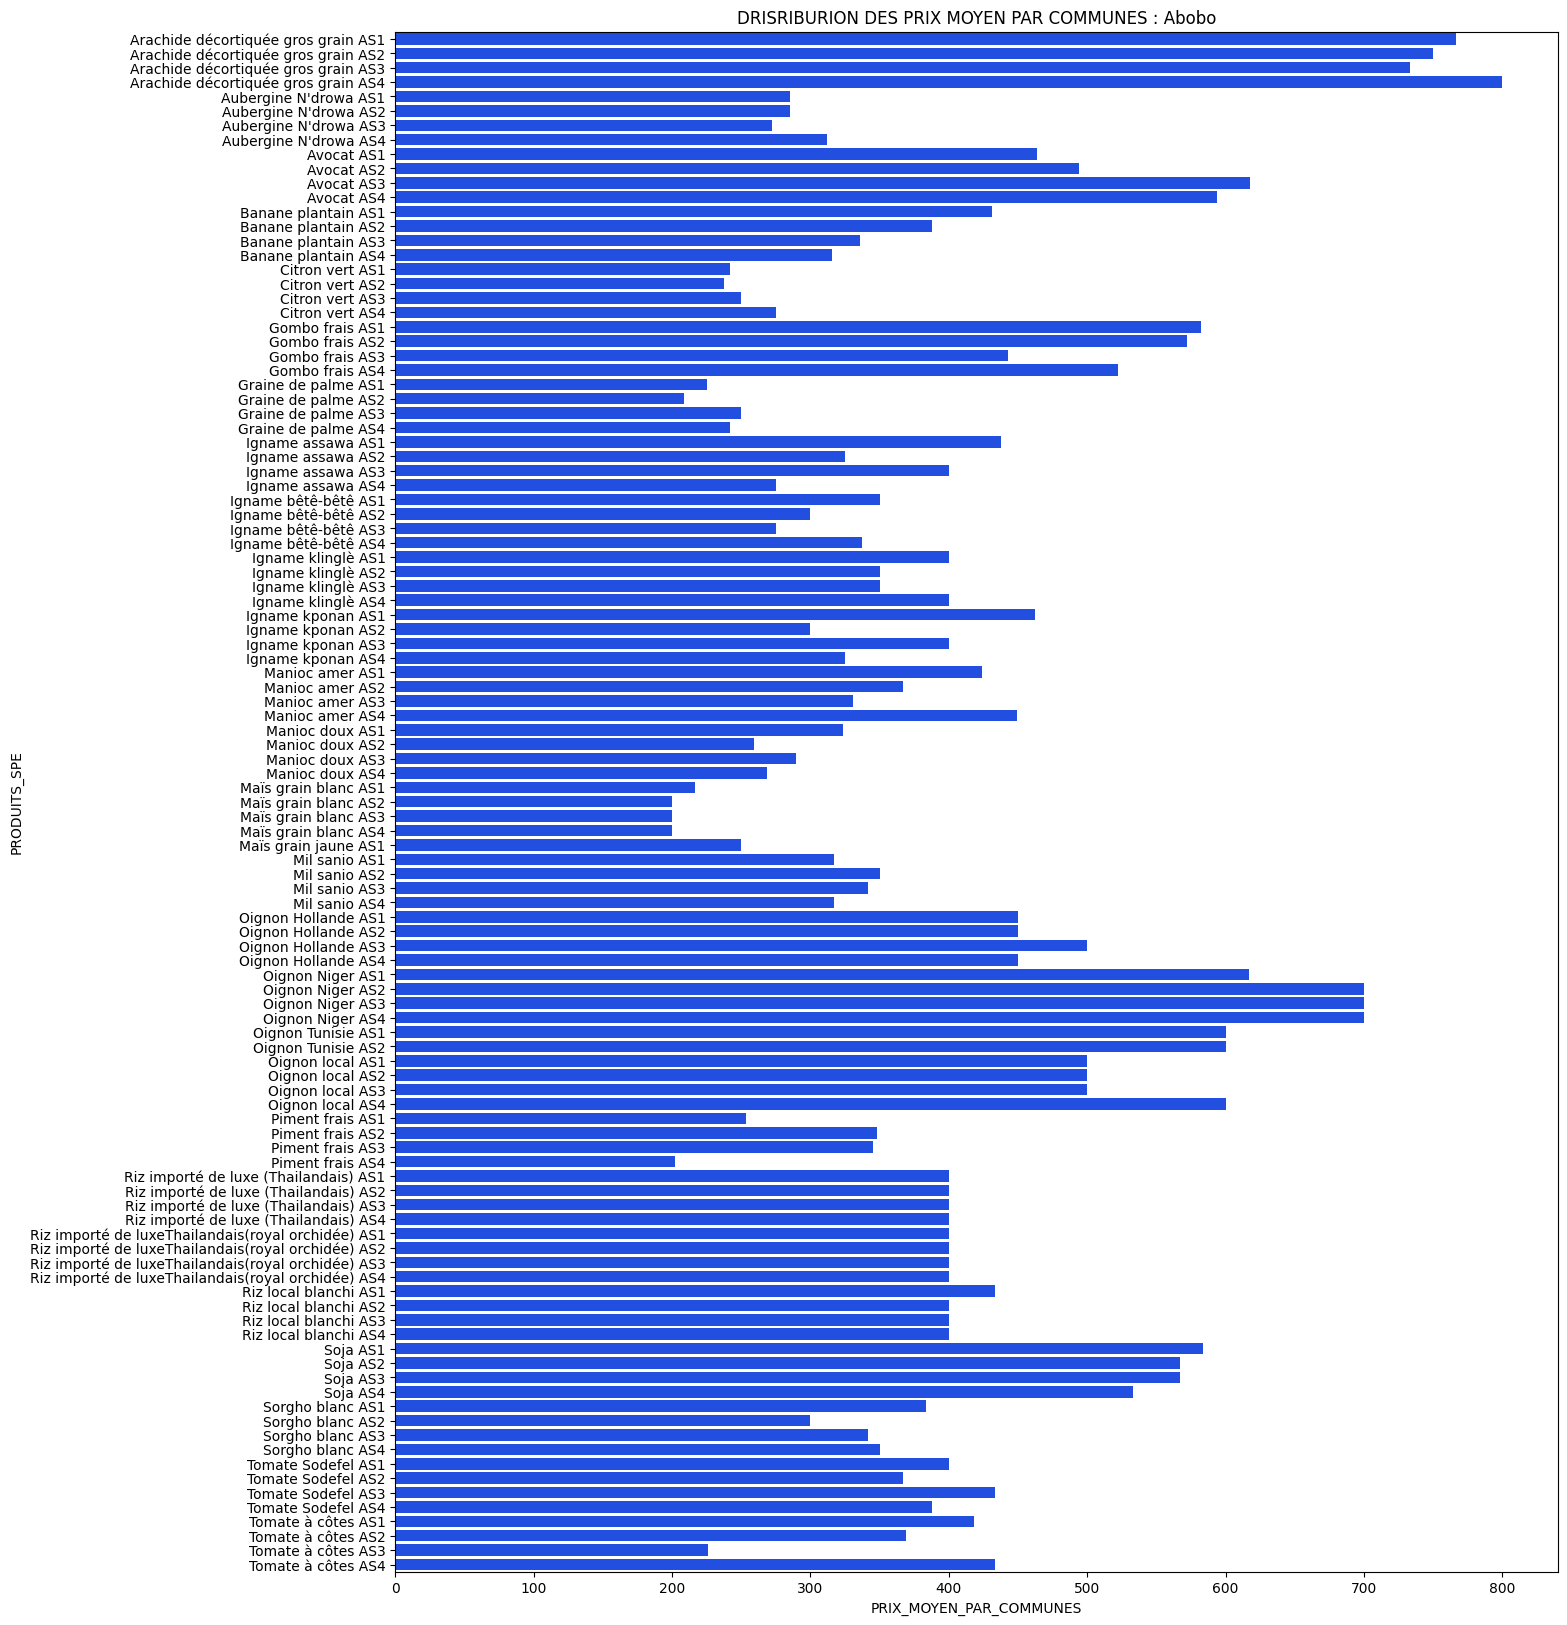

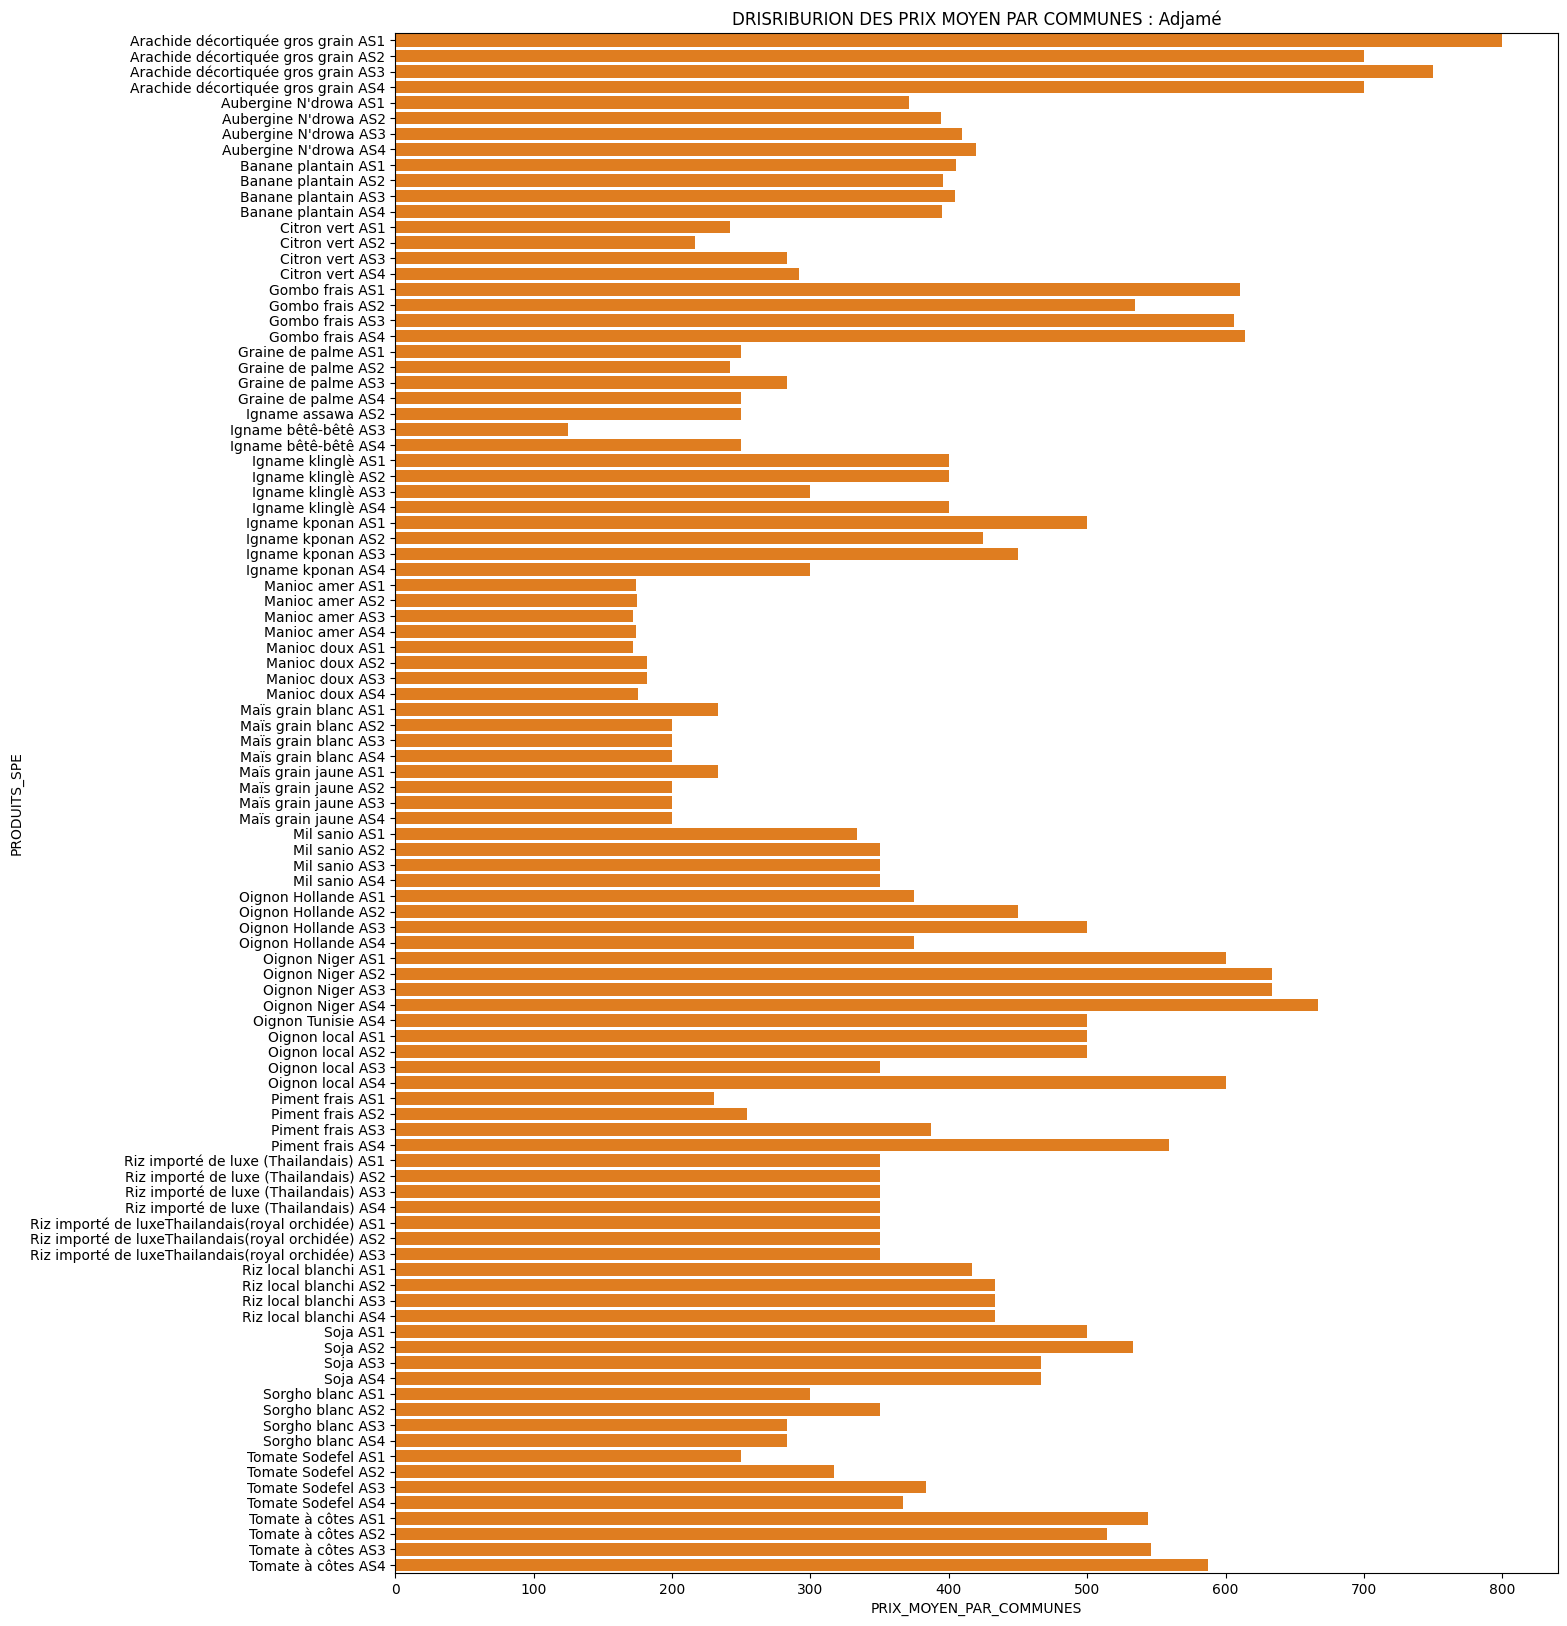

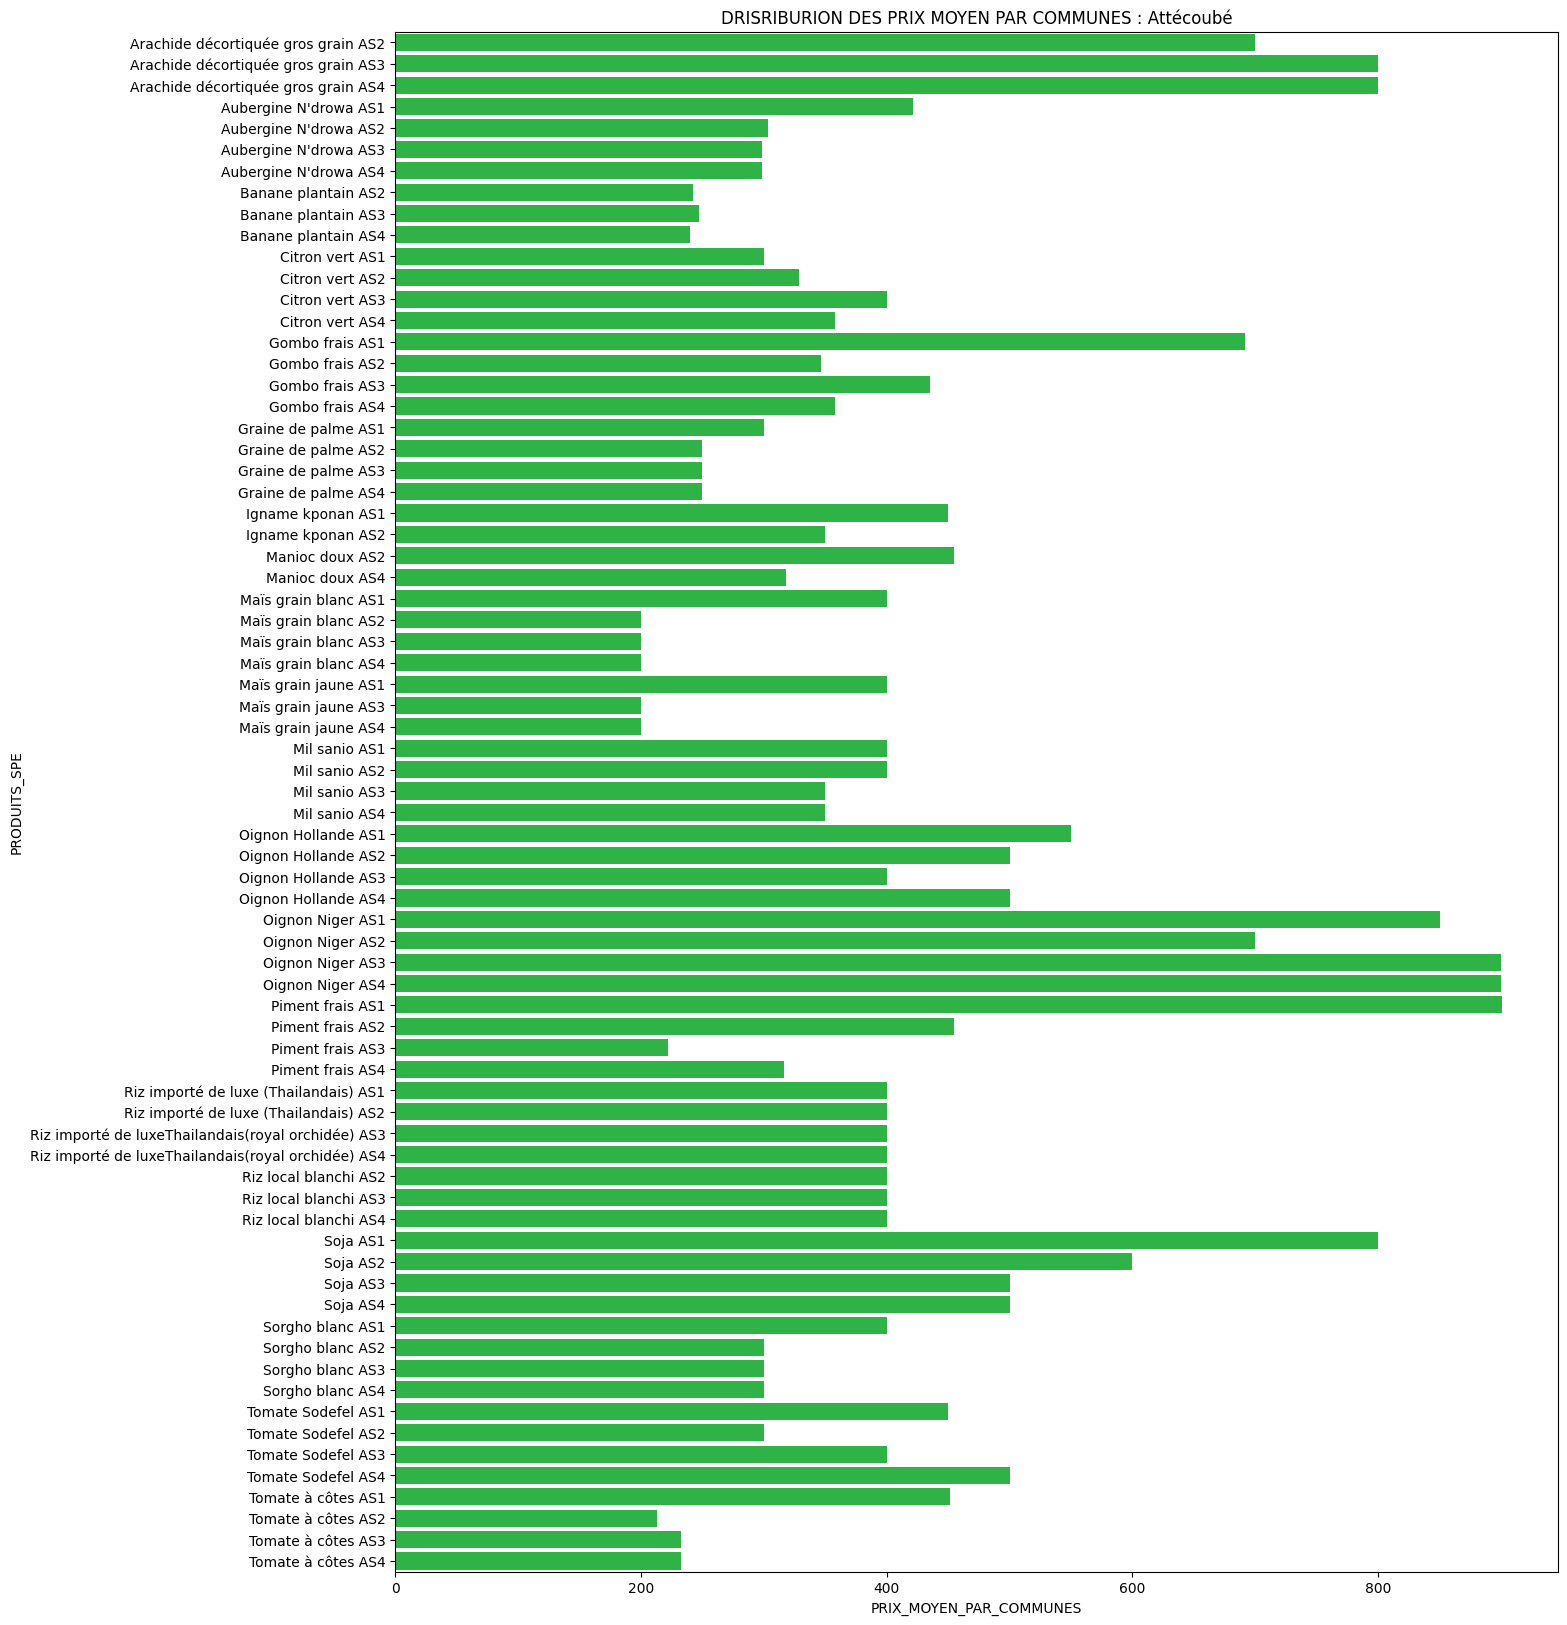

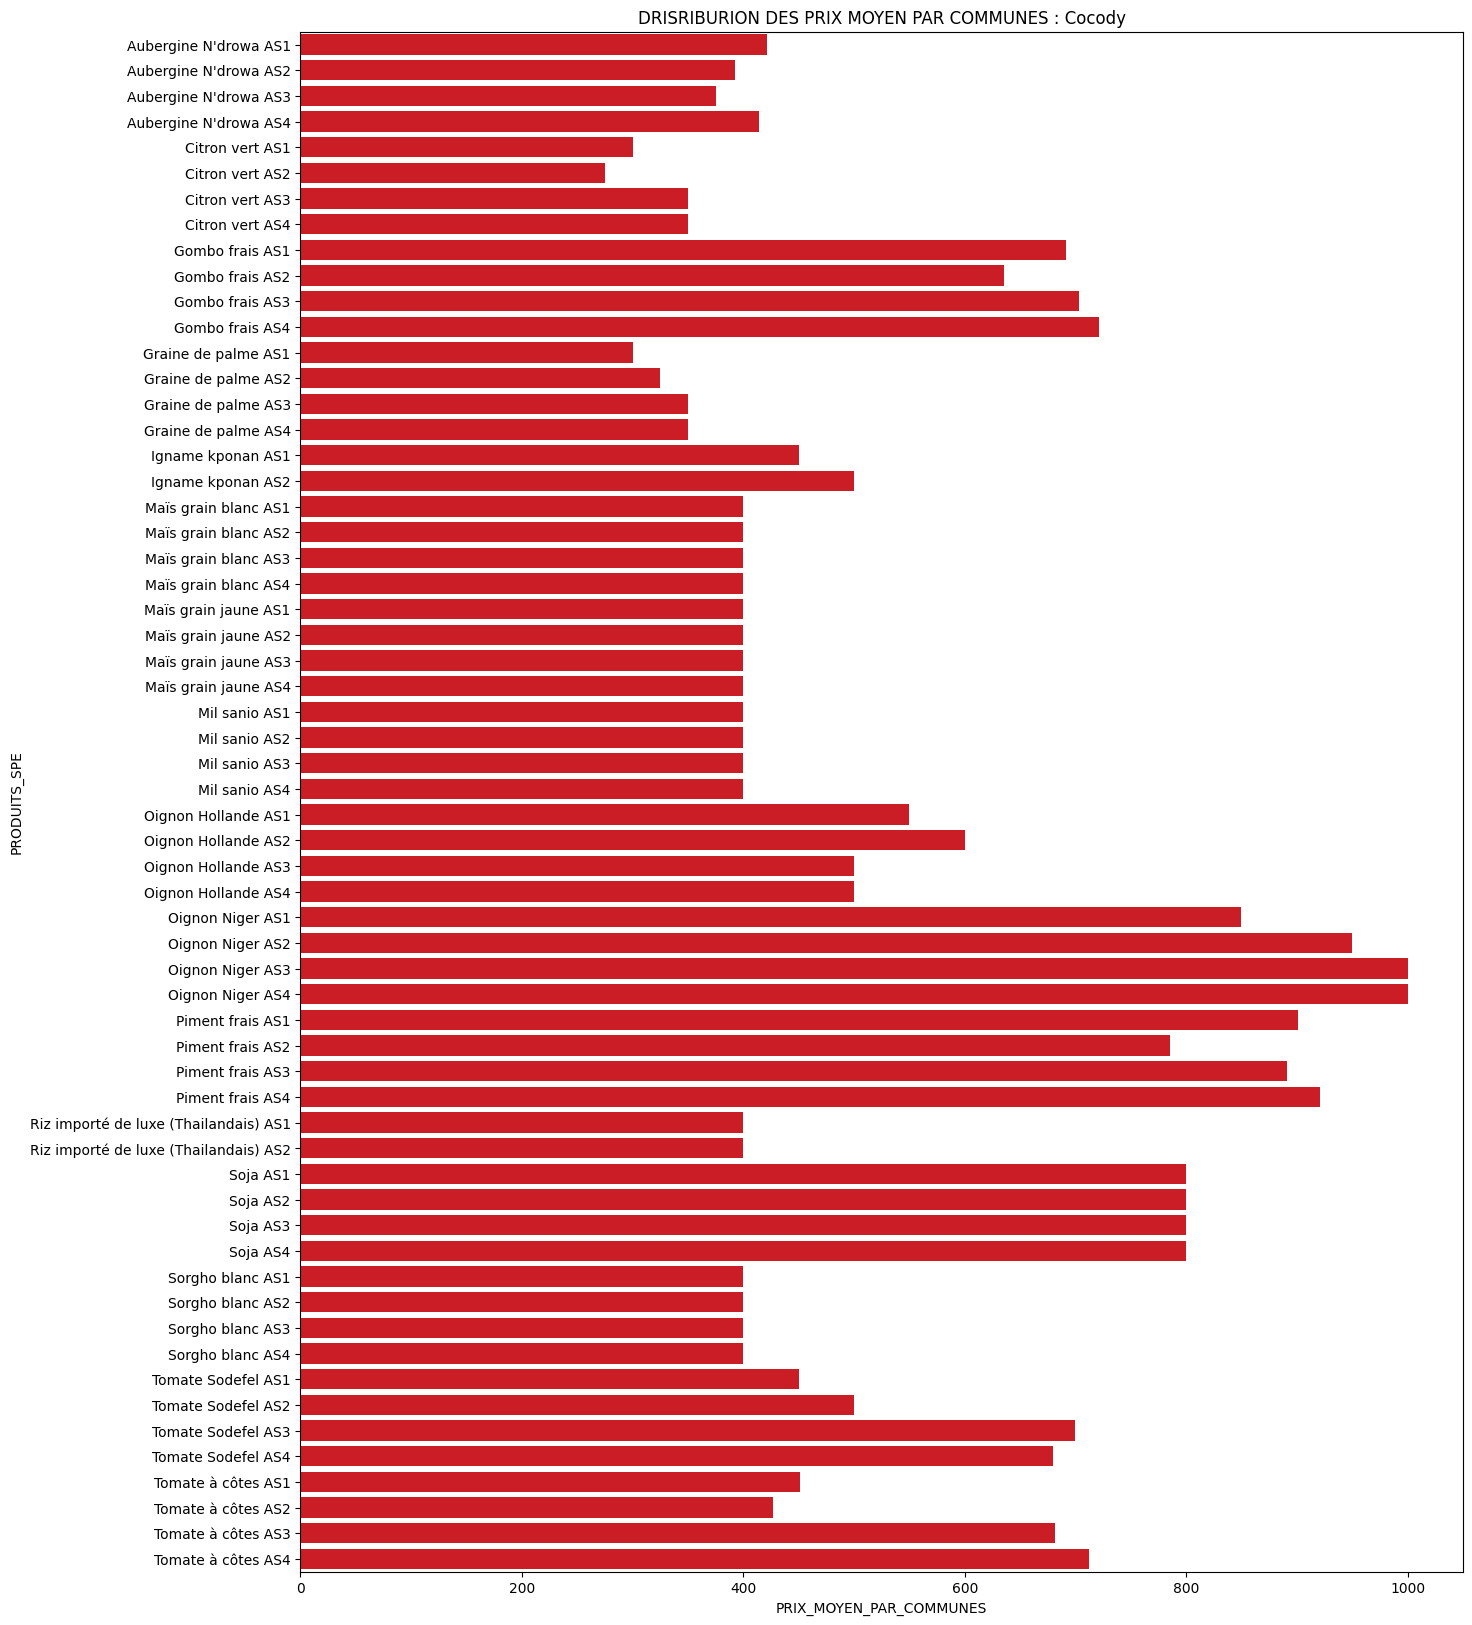

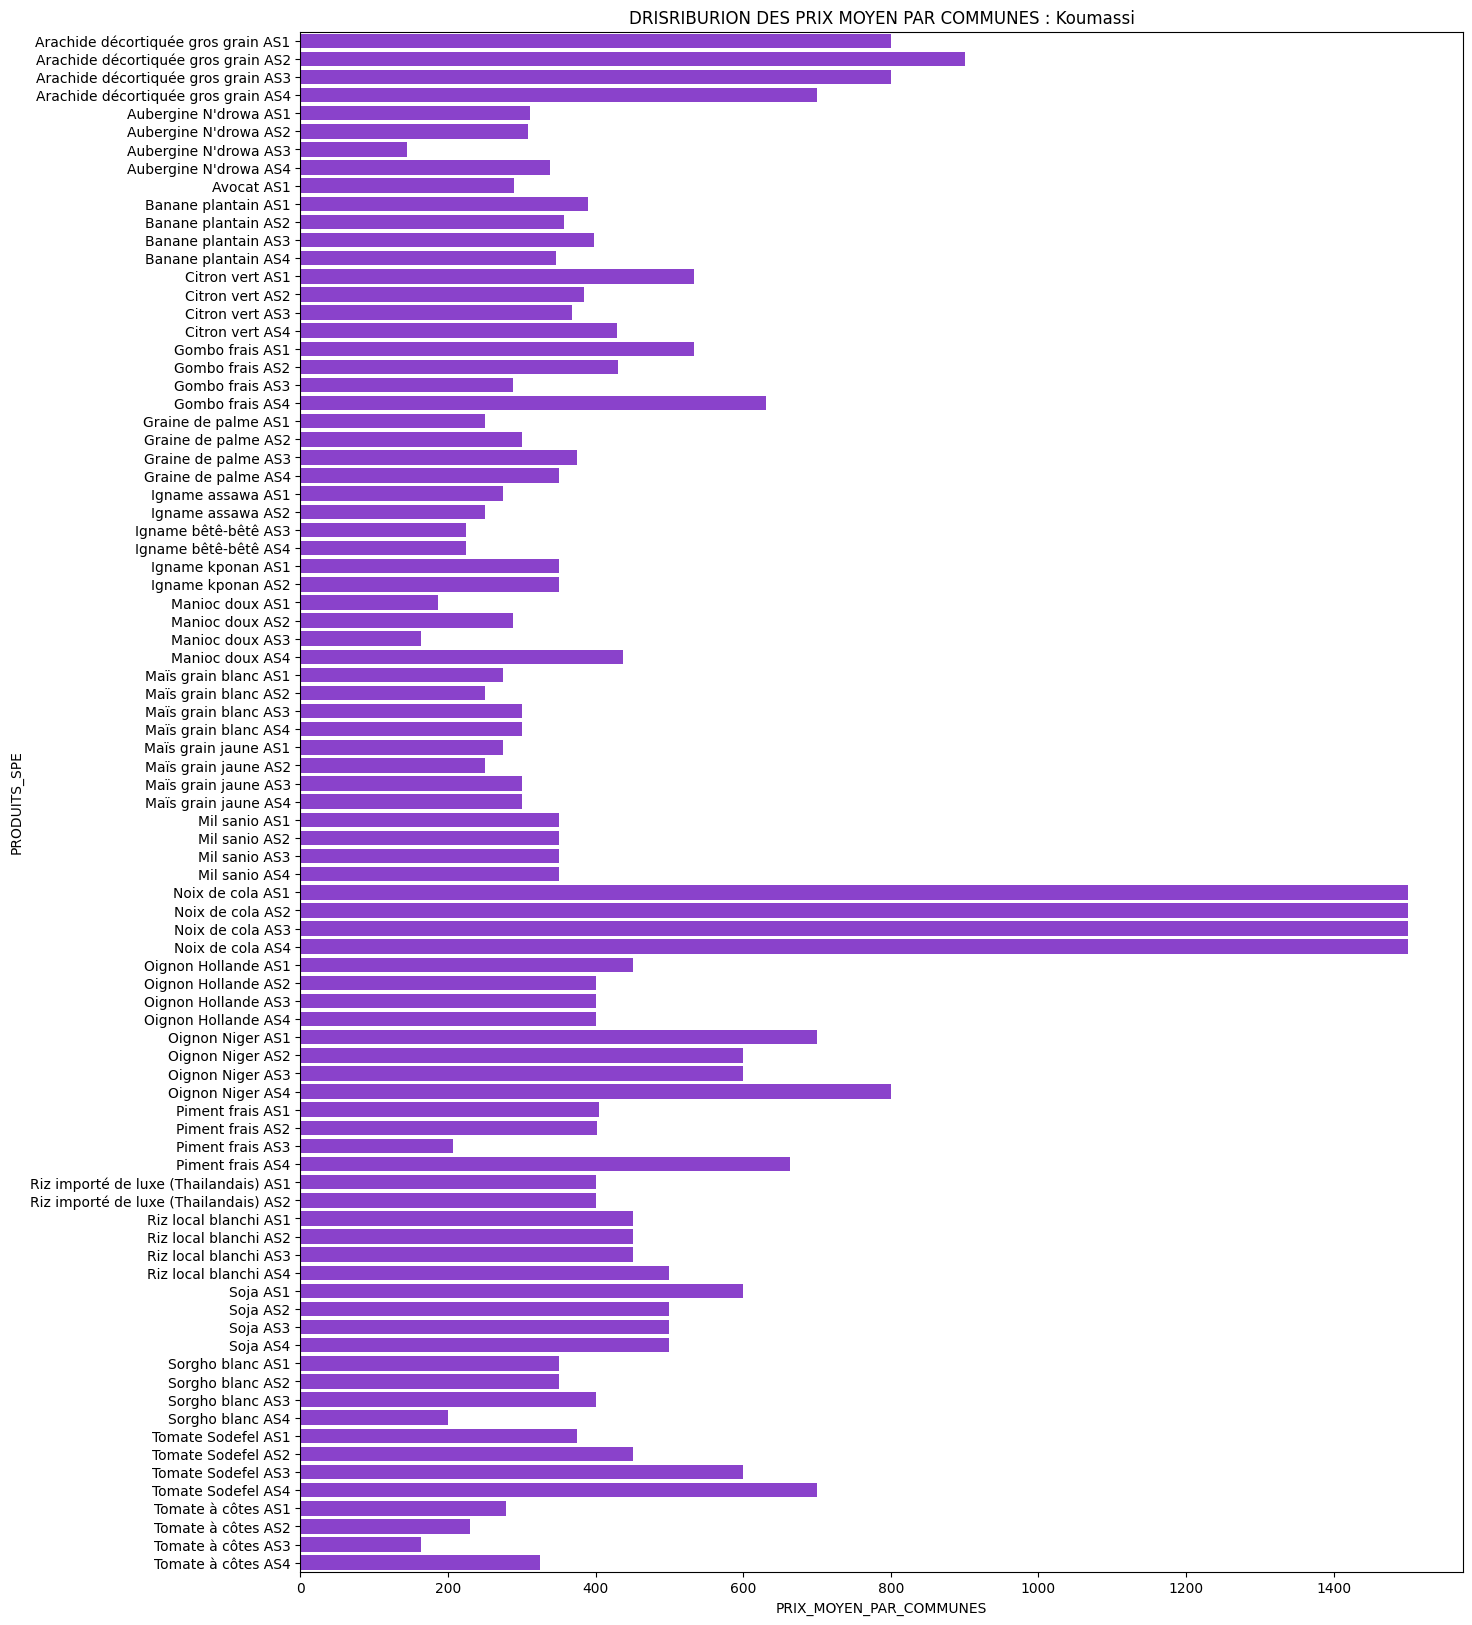

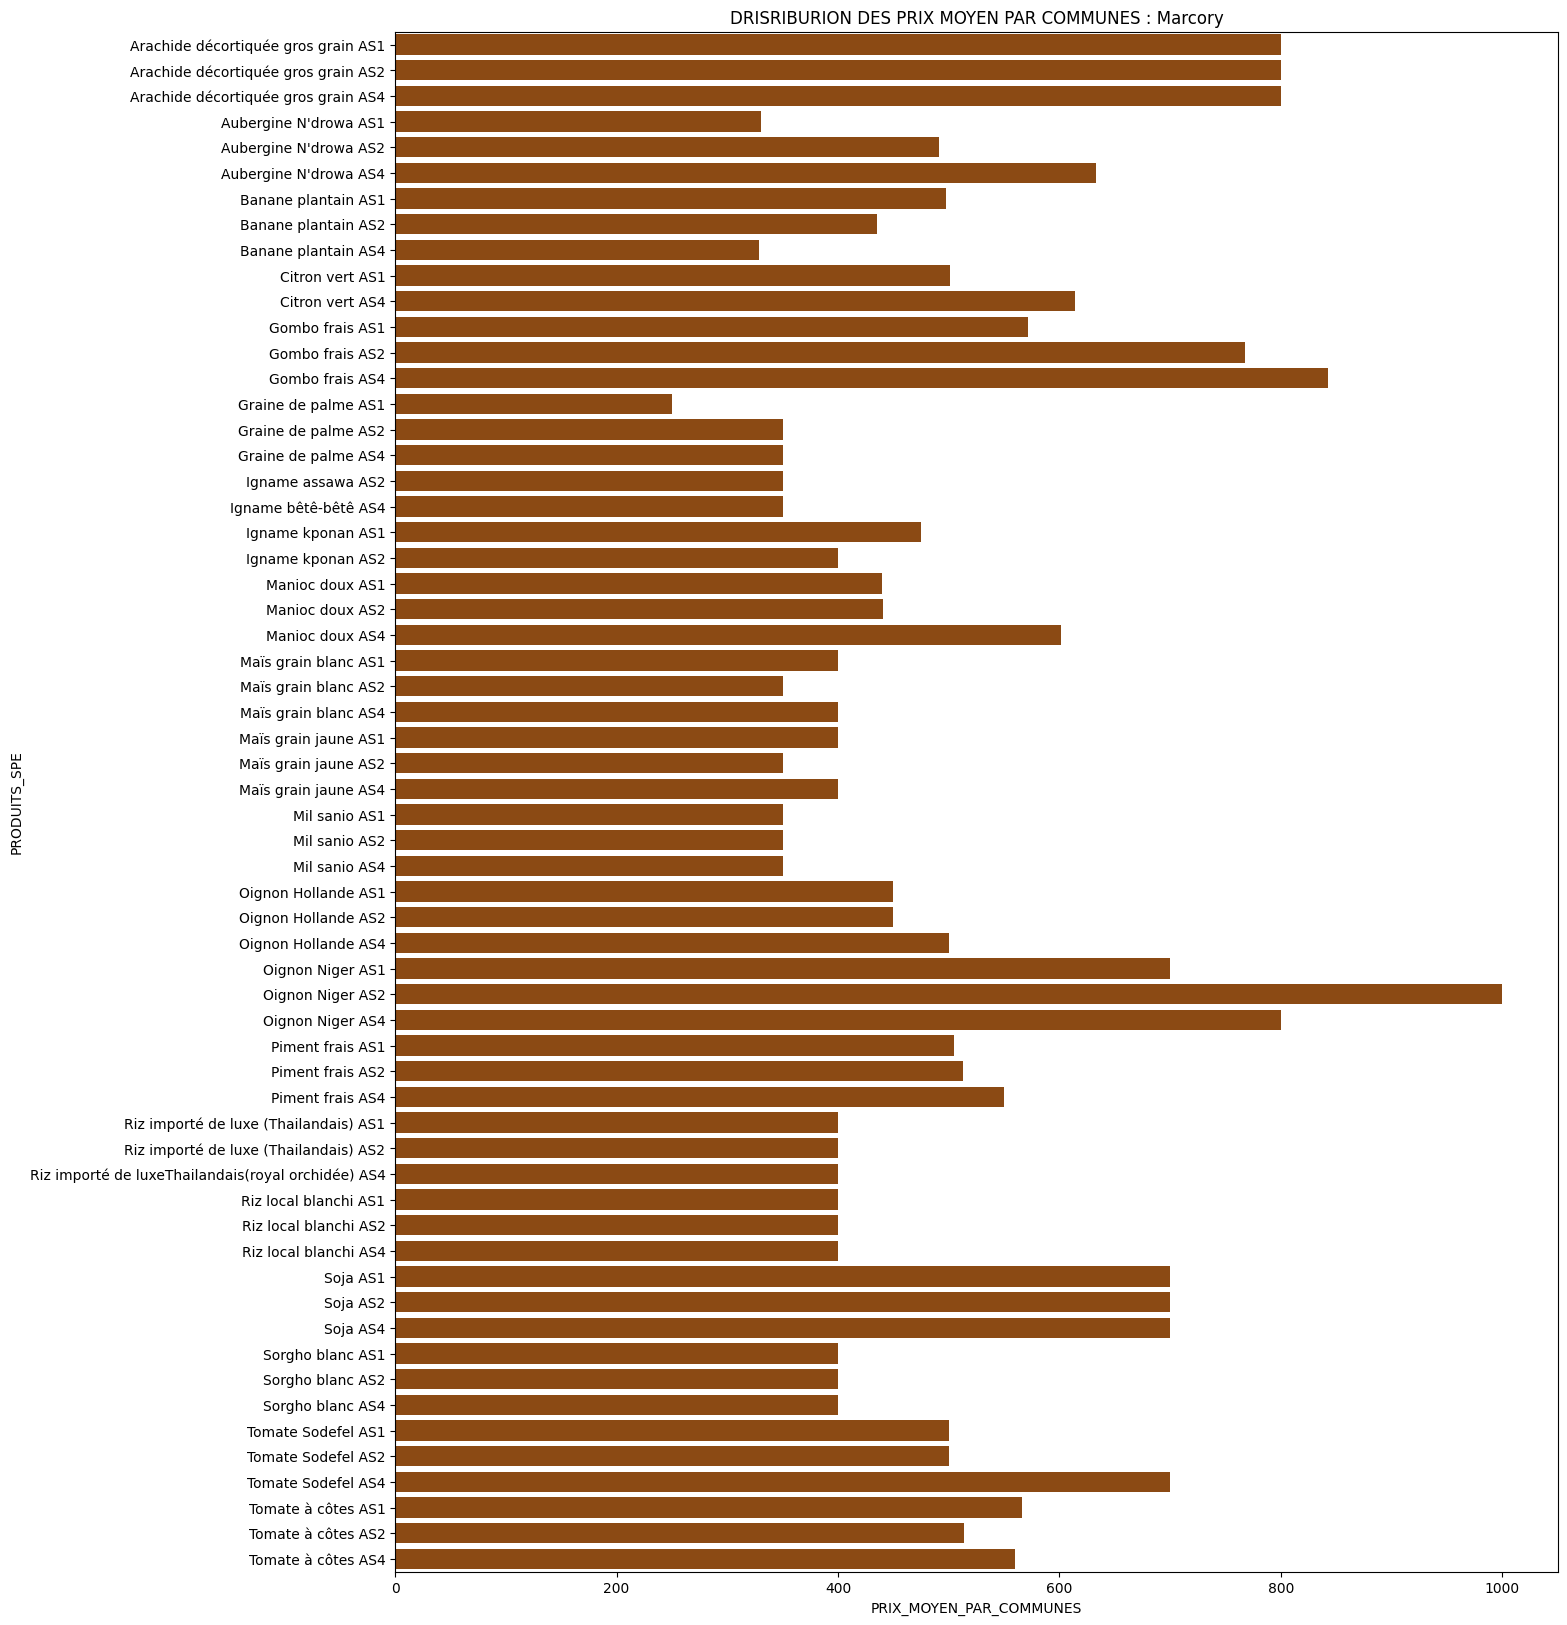

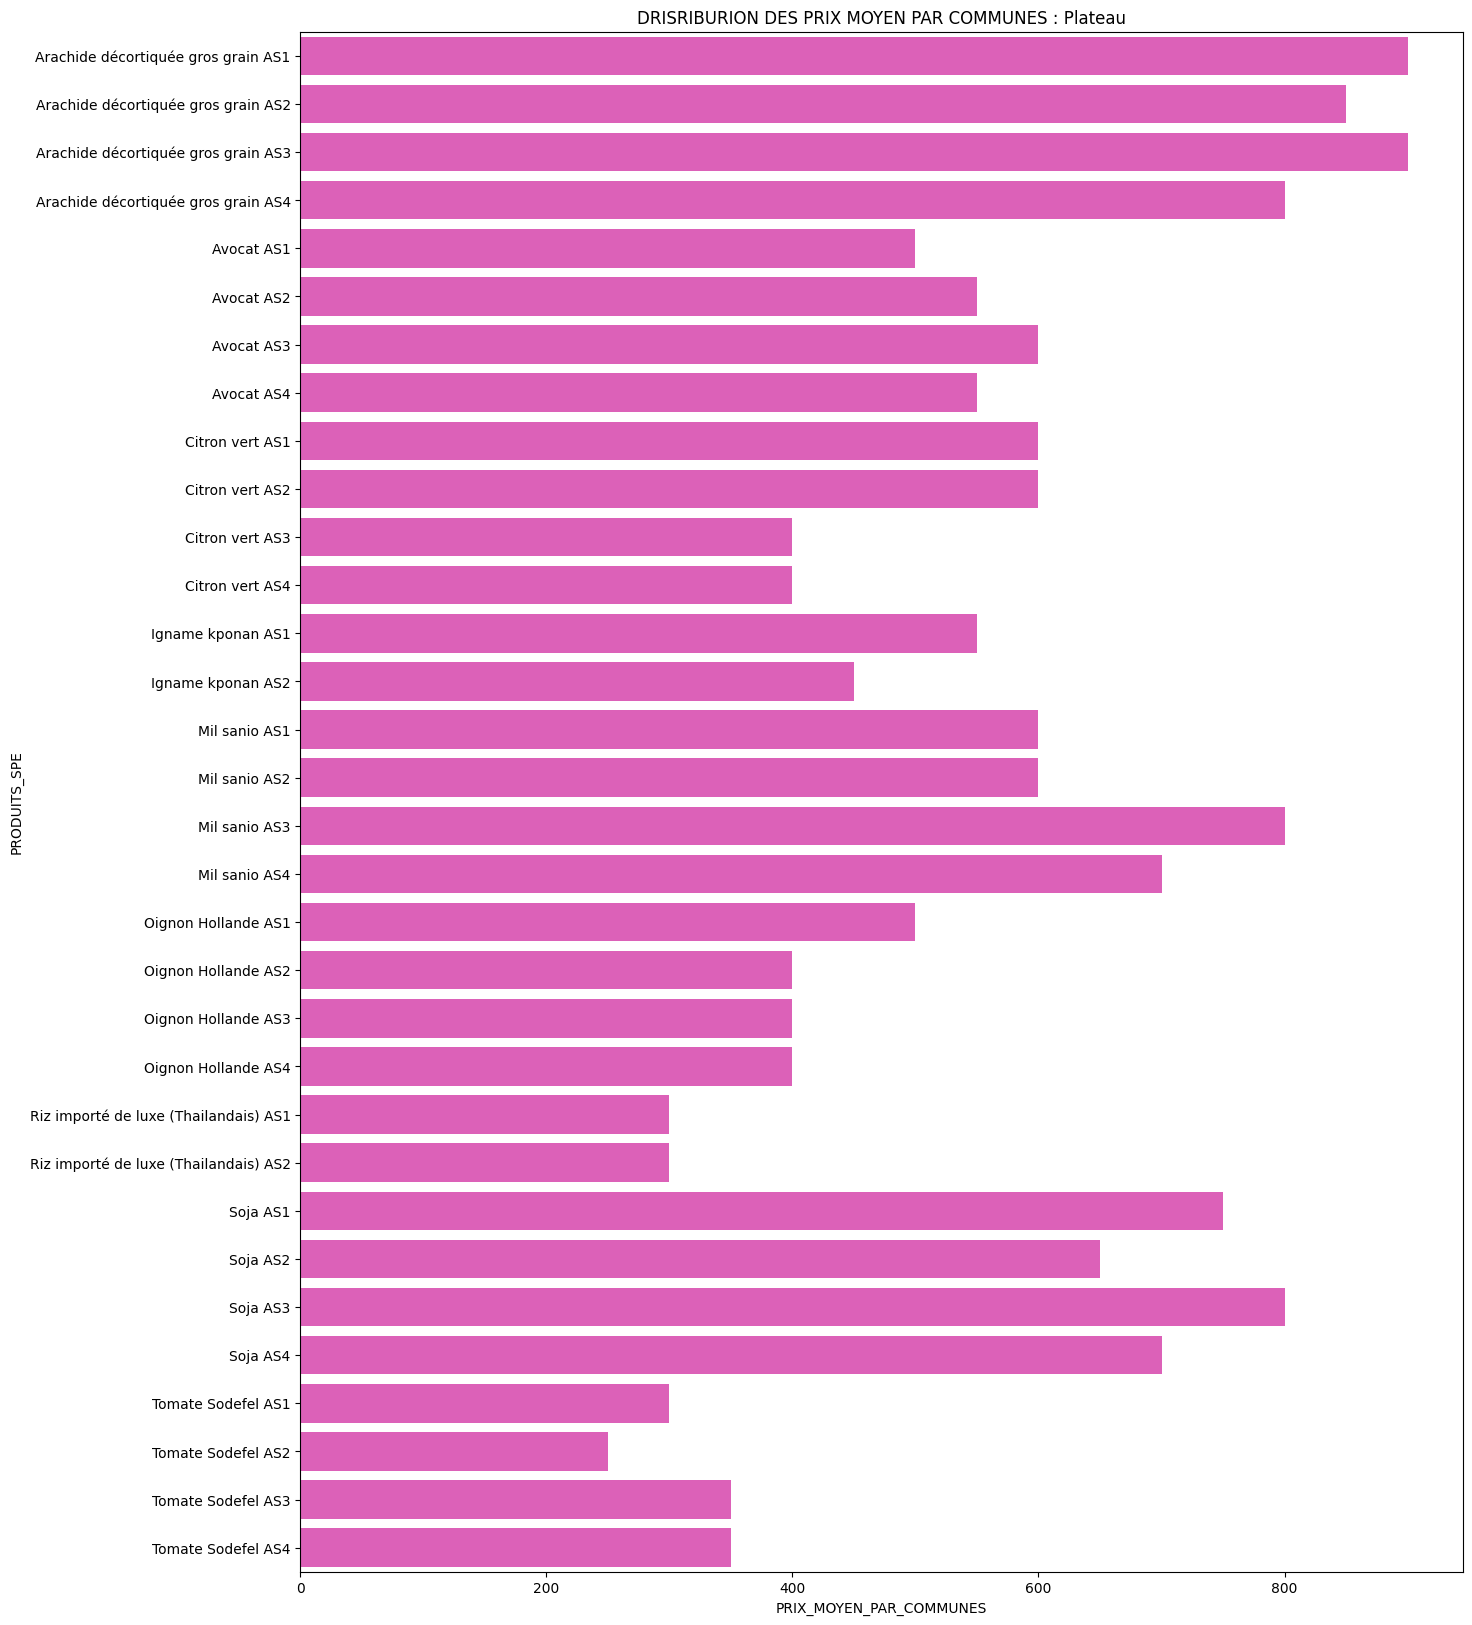

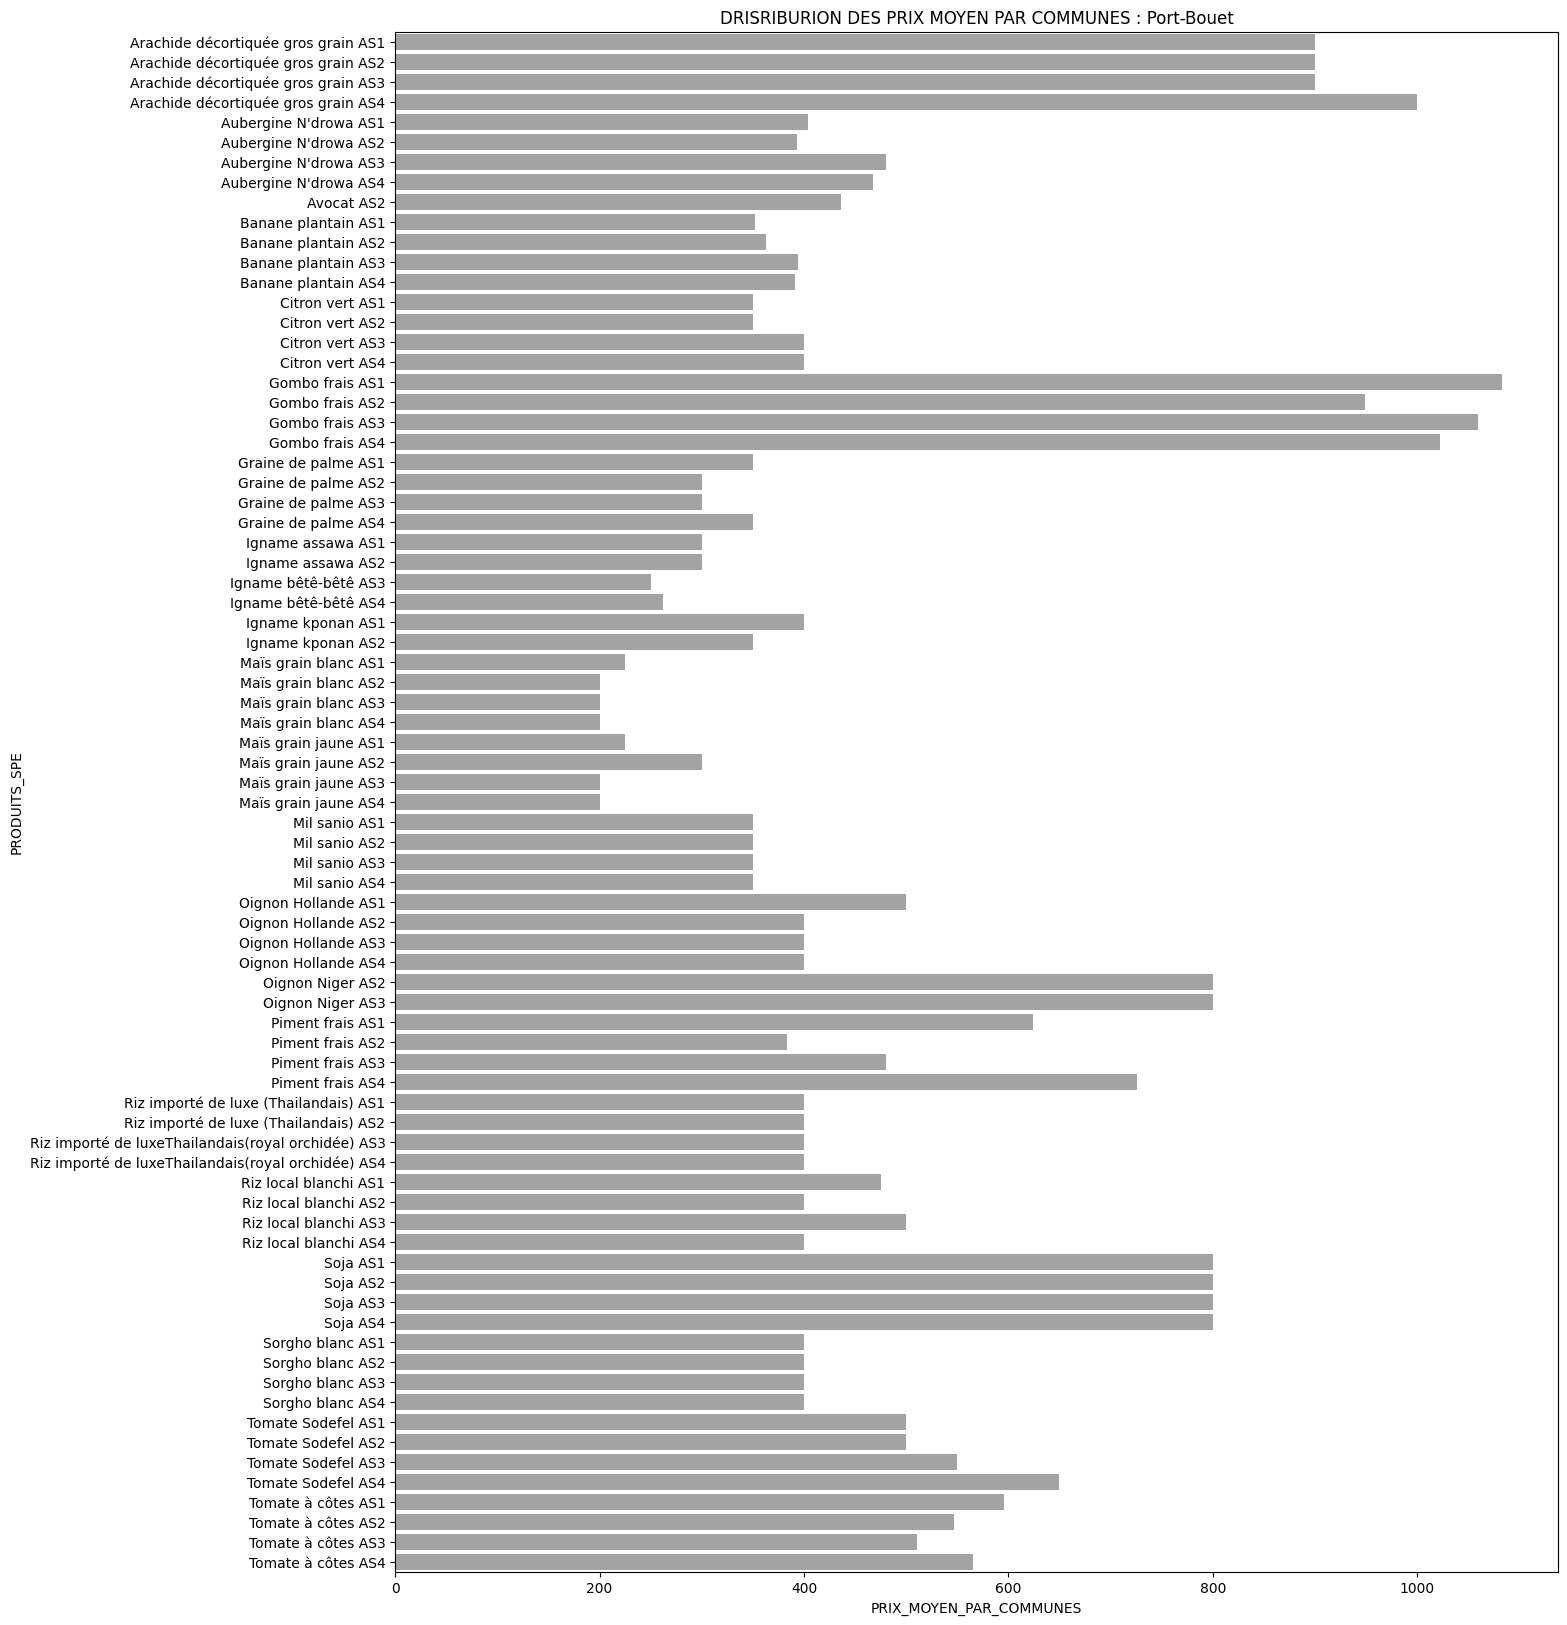

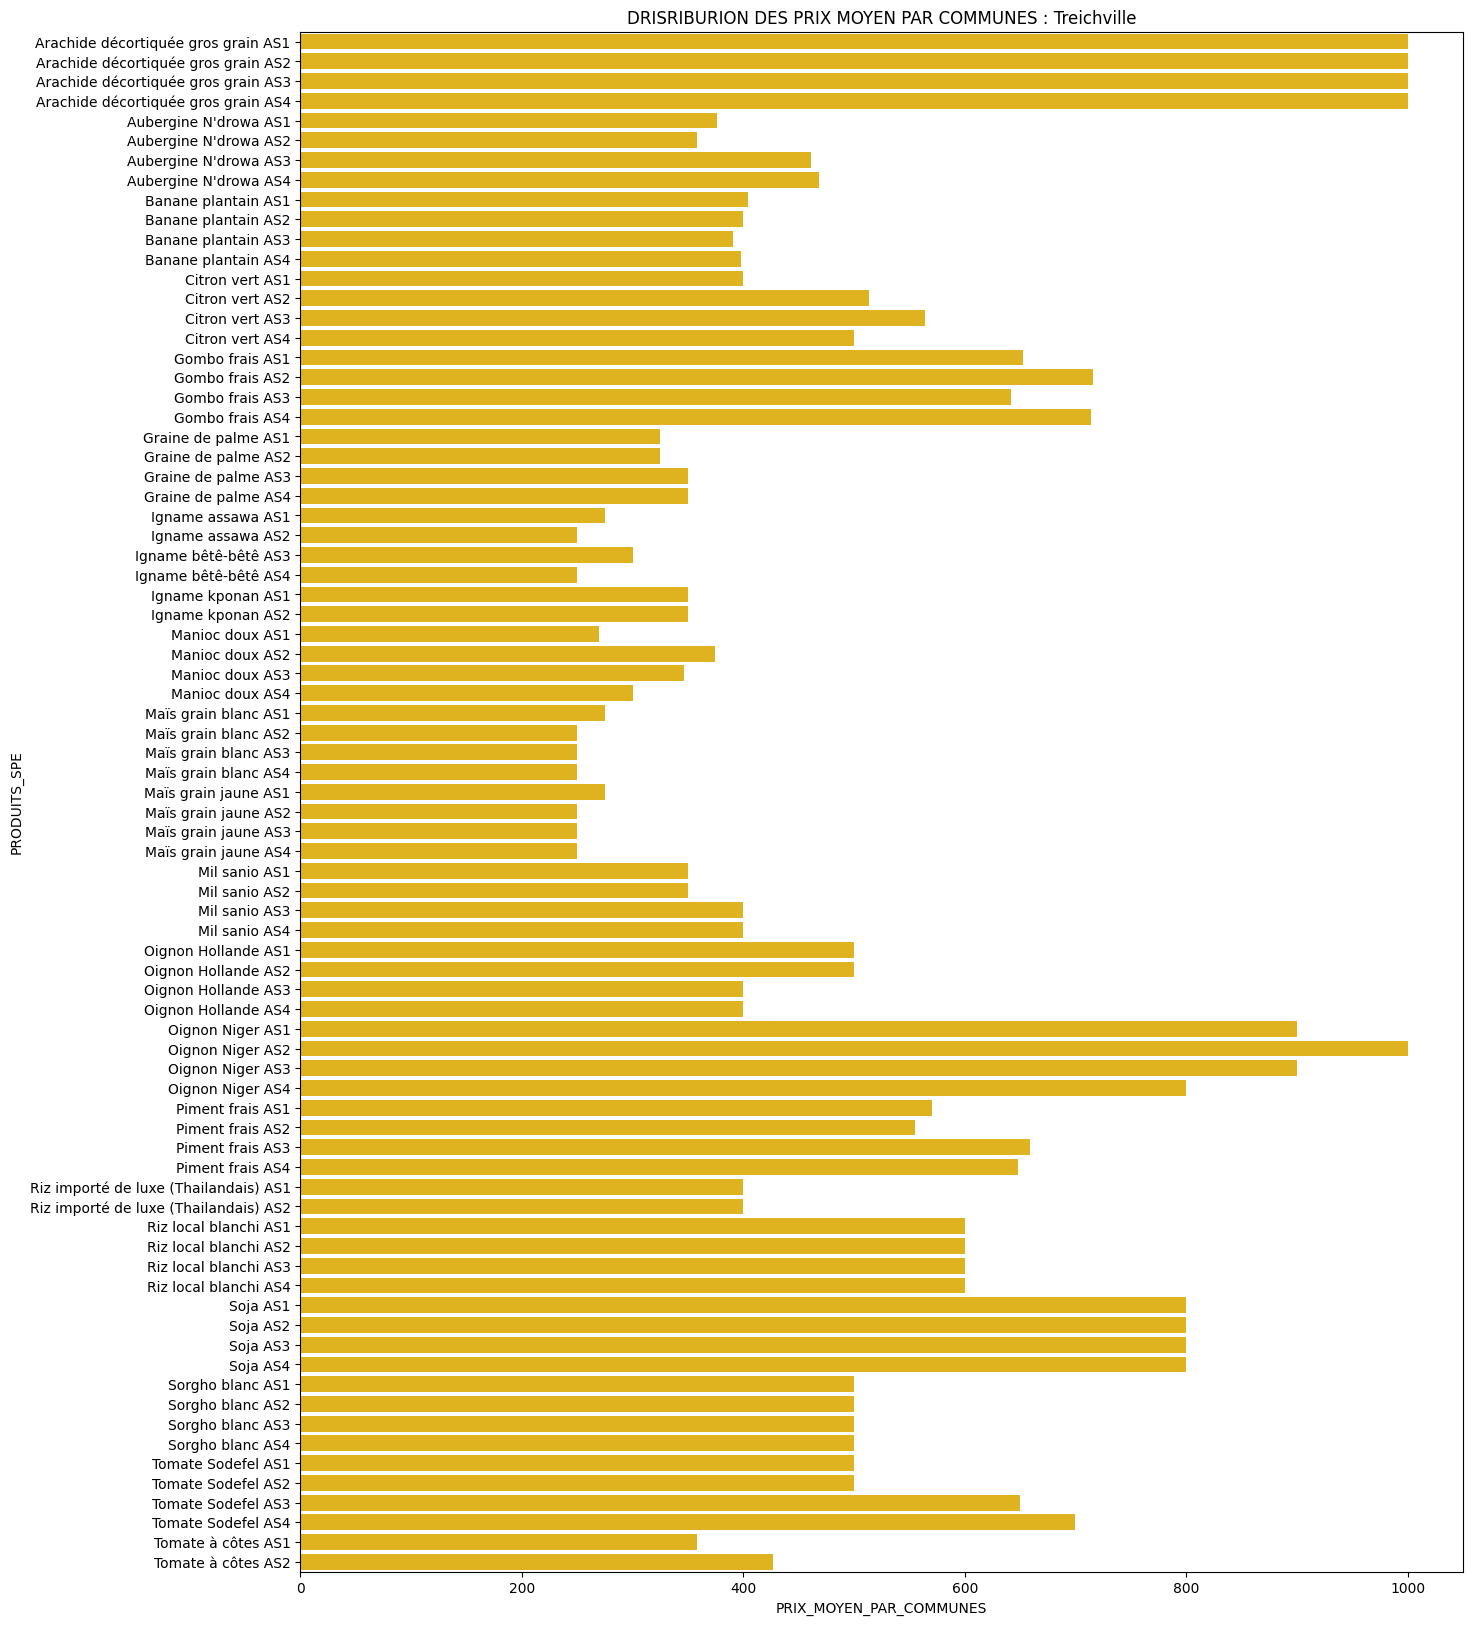

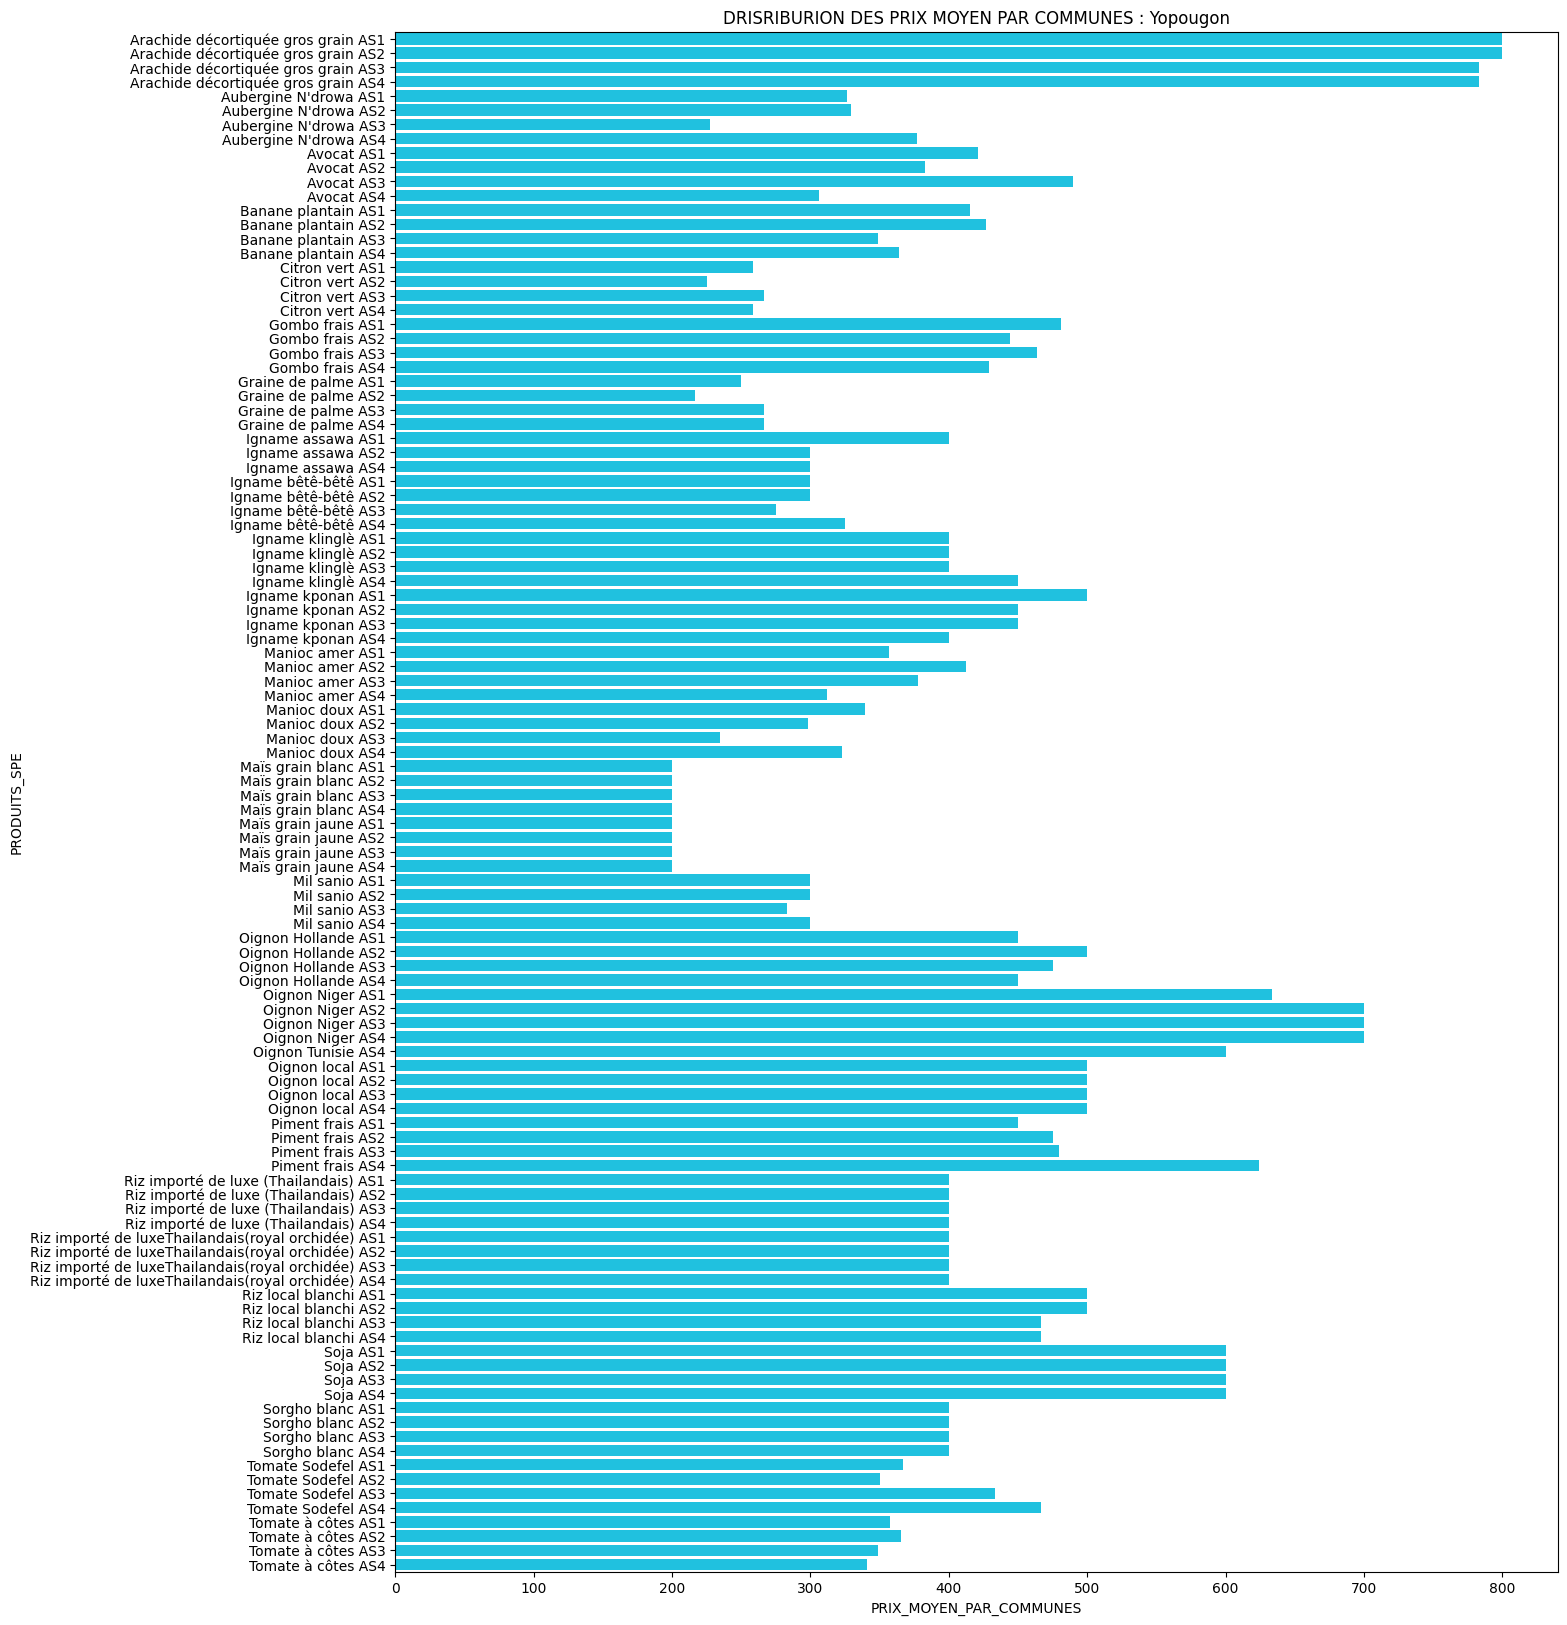

In [138]:
D0 = {}
for comm in prix_moyen_par_commune["COMMUNES"].unique():
    dfr = prix_moyen_par_commune.loc[prix_moyen_par_commune["COMMUNES"]==comm]
    D0[comm] = dfr
colors=sns.color_palette("bright",len(prix_moyen_par_commune["COMMUNES"]))
for i, comm in enumerate(prix_moyen_par_commune["COMMUNES"].unique()):
    plt.figure(figsize=(15,20))
    sns.barplot(D0[comm],y="PRODUITS_SPE",x="PRIX_MOYEN_PAR_COMMUNES",color=colors[i])
    plt.title(f"DRISRIBURION DES PRIX MOYEN PAR COMMUNES : {comm}")
    plt.show()

#### Representation croisée

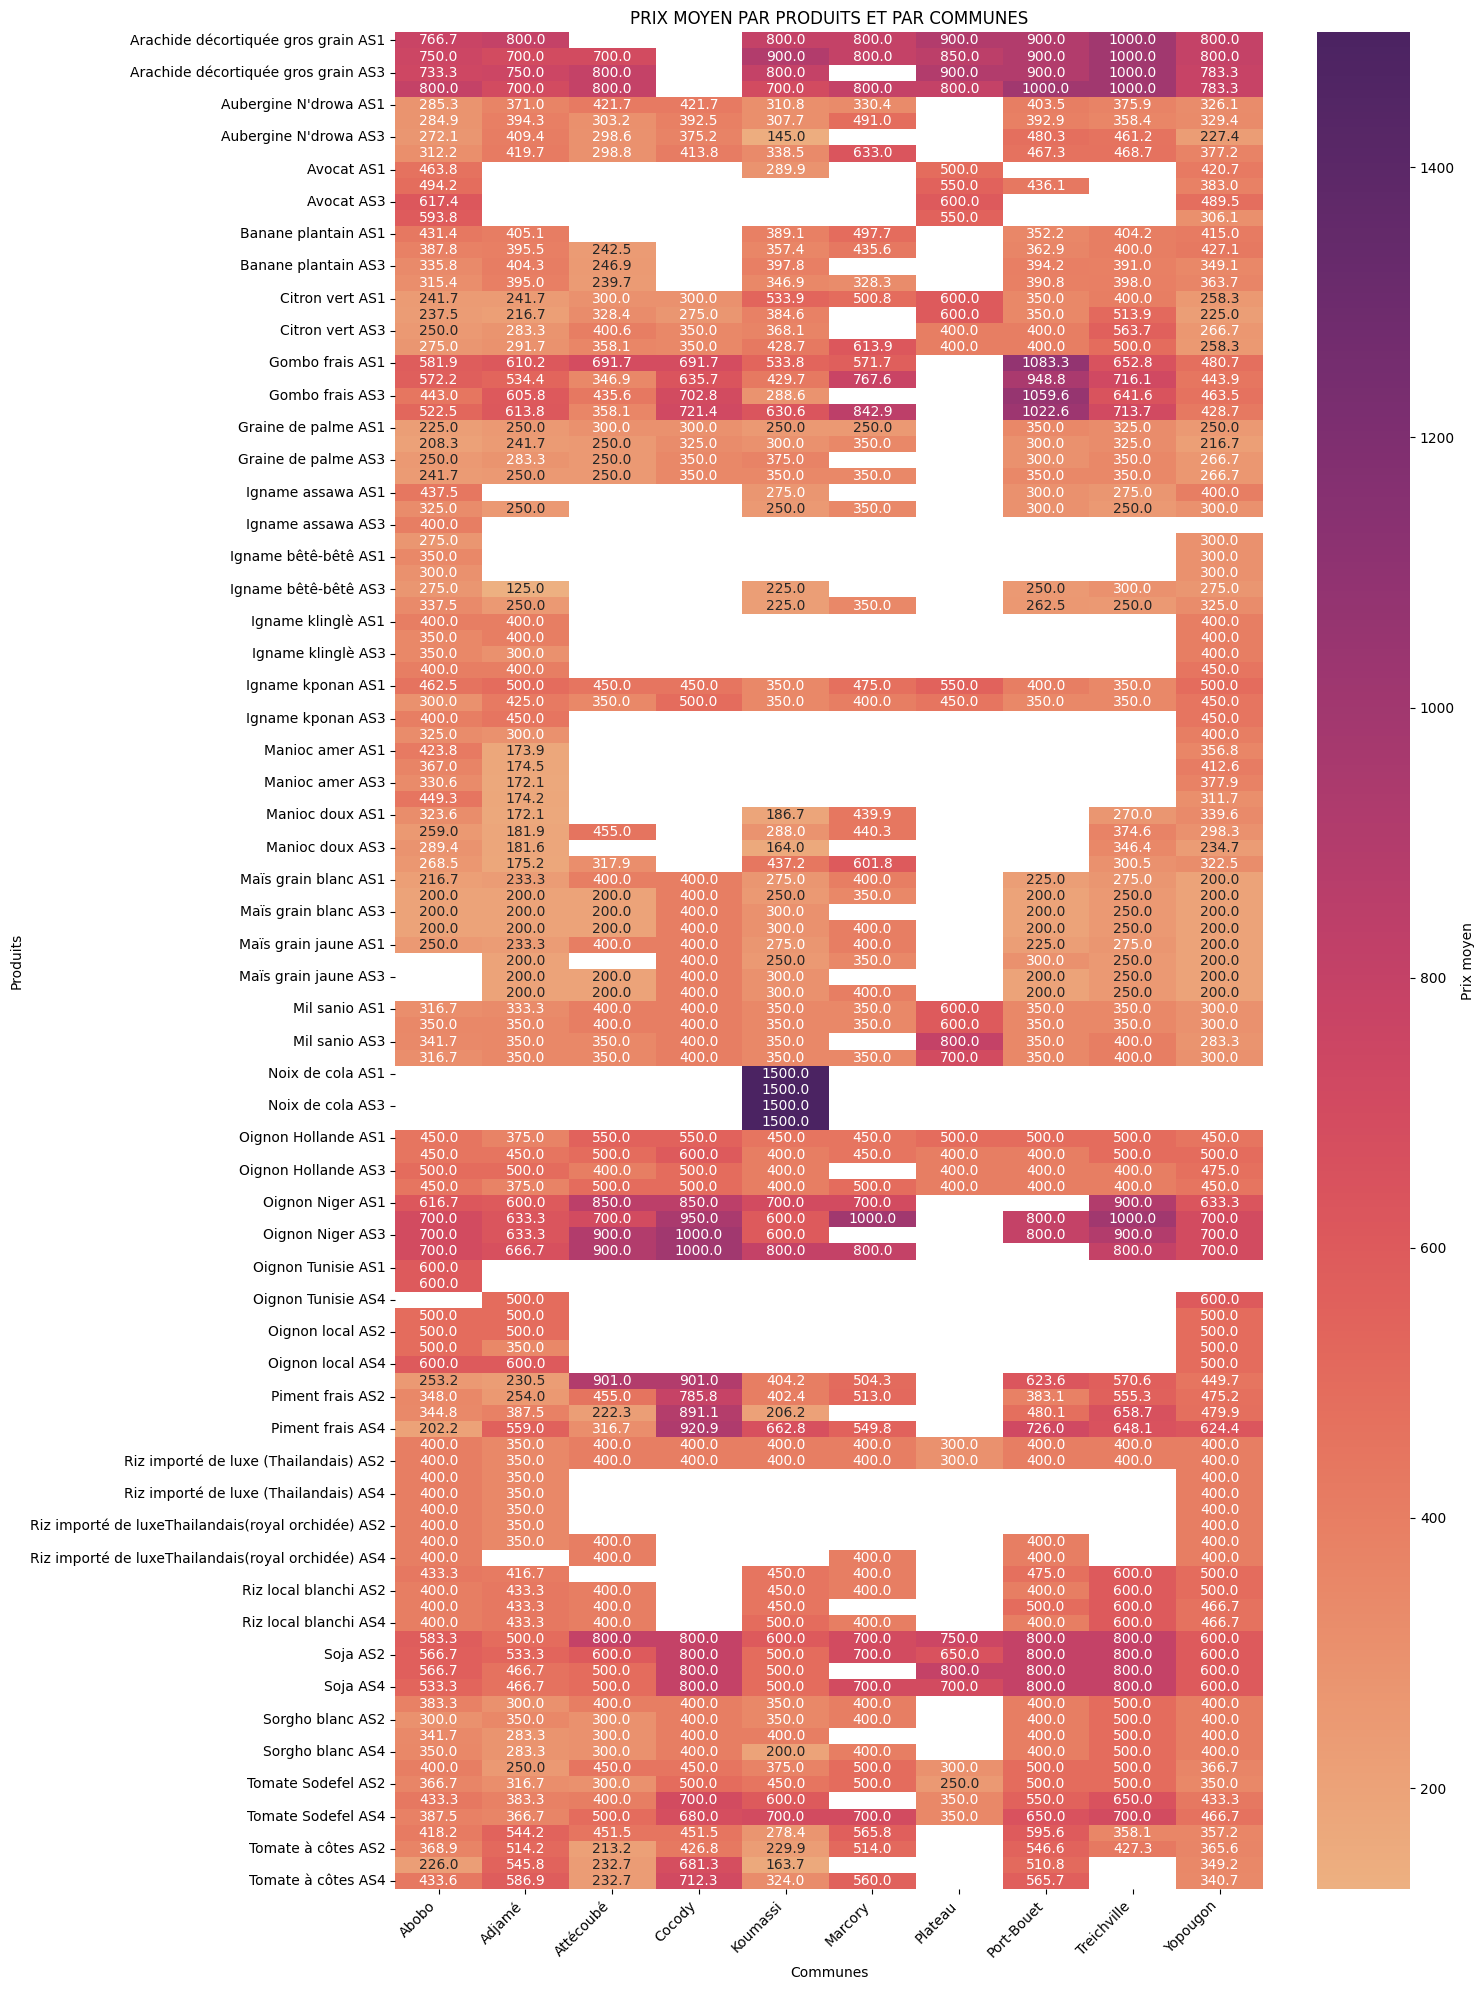

In [139]:
heatmap_comm = prix_moyen_par_commune.pivot_table(
    index="PRODUITS_SPE",   
    columns="COMMUNES",     
    values="PRIX_MOYEN_PAR_COMMUNES"  
)
plt.figure(figsize=(15, 20))
sns.heatmap(heatmap_comm, annot=True, fmt=".1f",cmap="flare",cbar_kws={'label': 'Prix moyen'} ) #fmt=".1f" <- pour l'affichage des valeurs
plt.title("PRIX MOYEN PAR PRODUITS ET PAR COMMUNES")
plt.xlabel("Communes")
plt.ylabel("Produits")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

##### 3.a.2.1.2-Distribution des prix moyen par mois

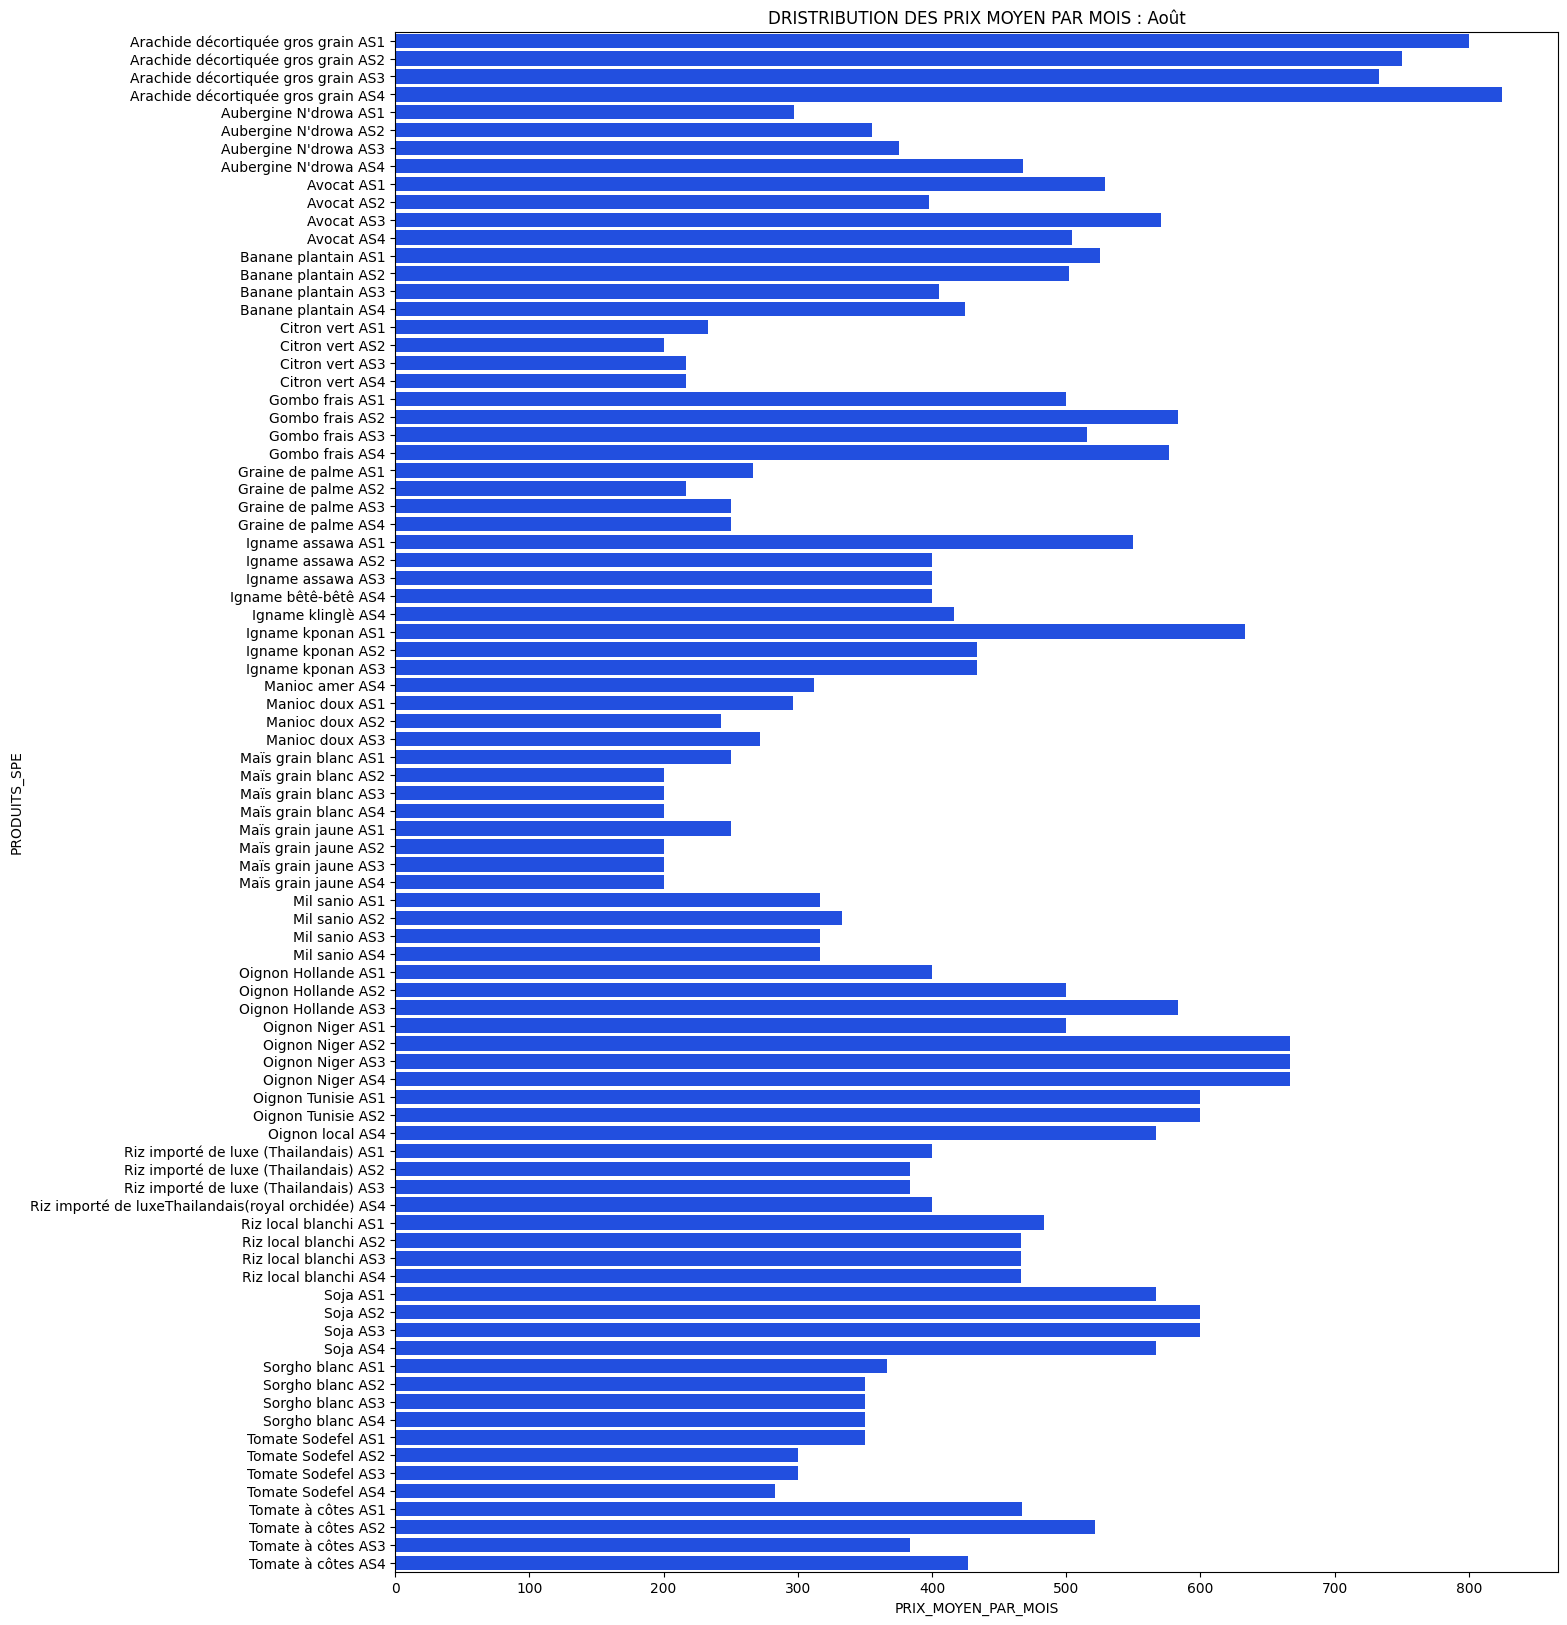

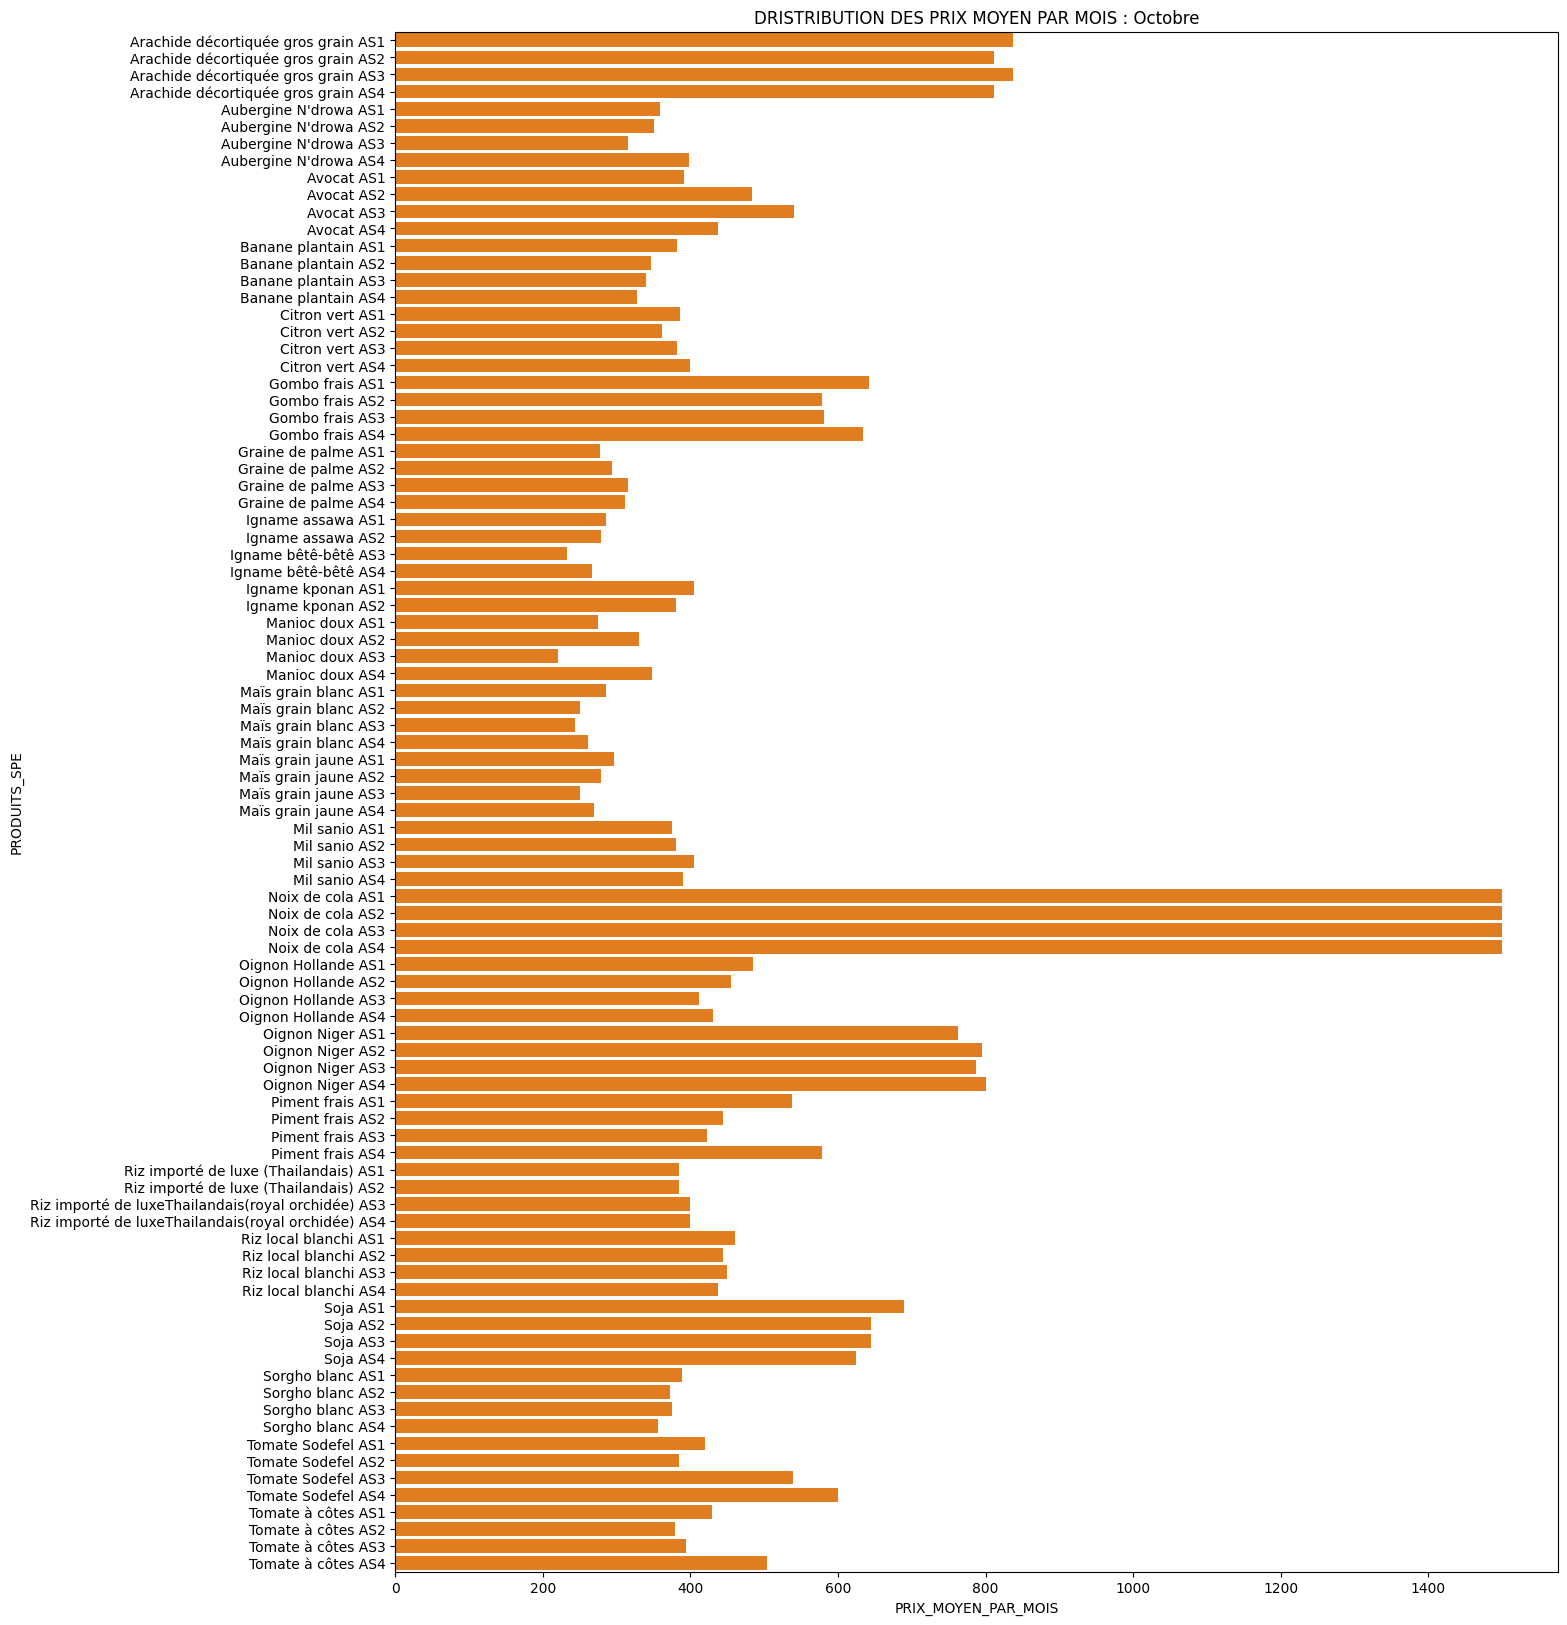

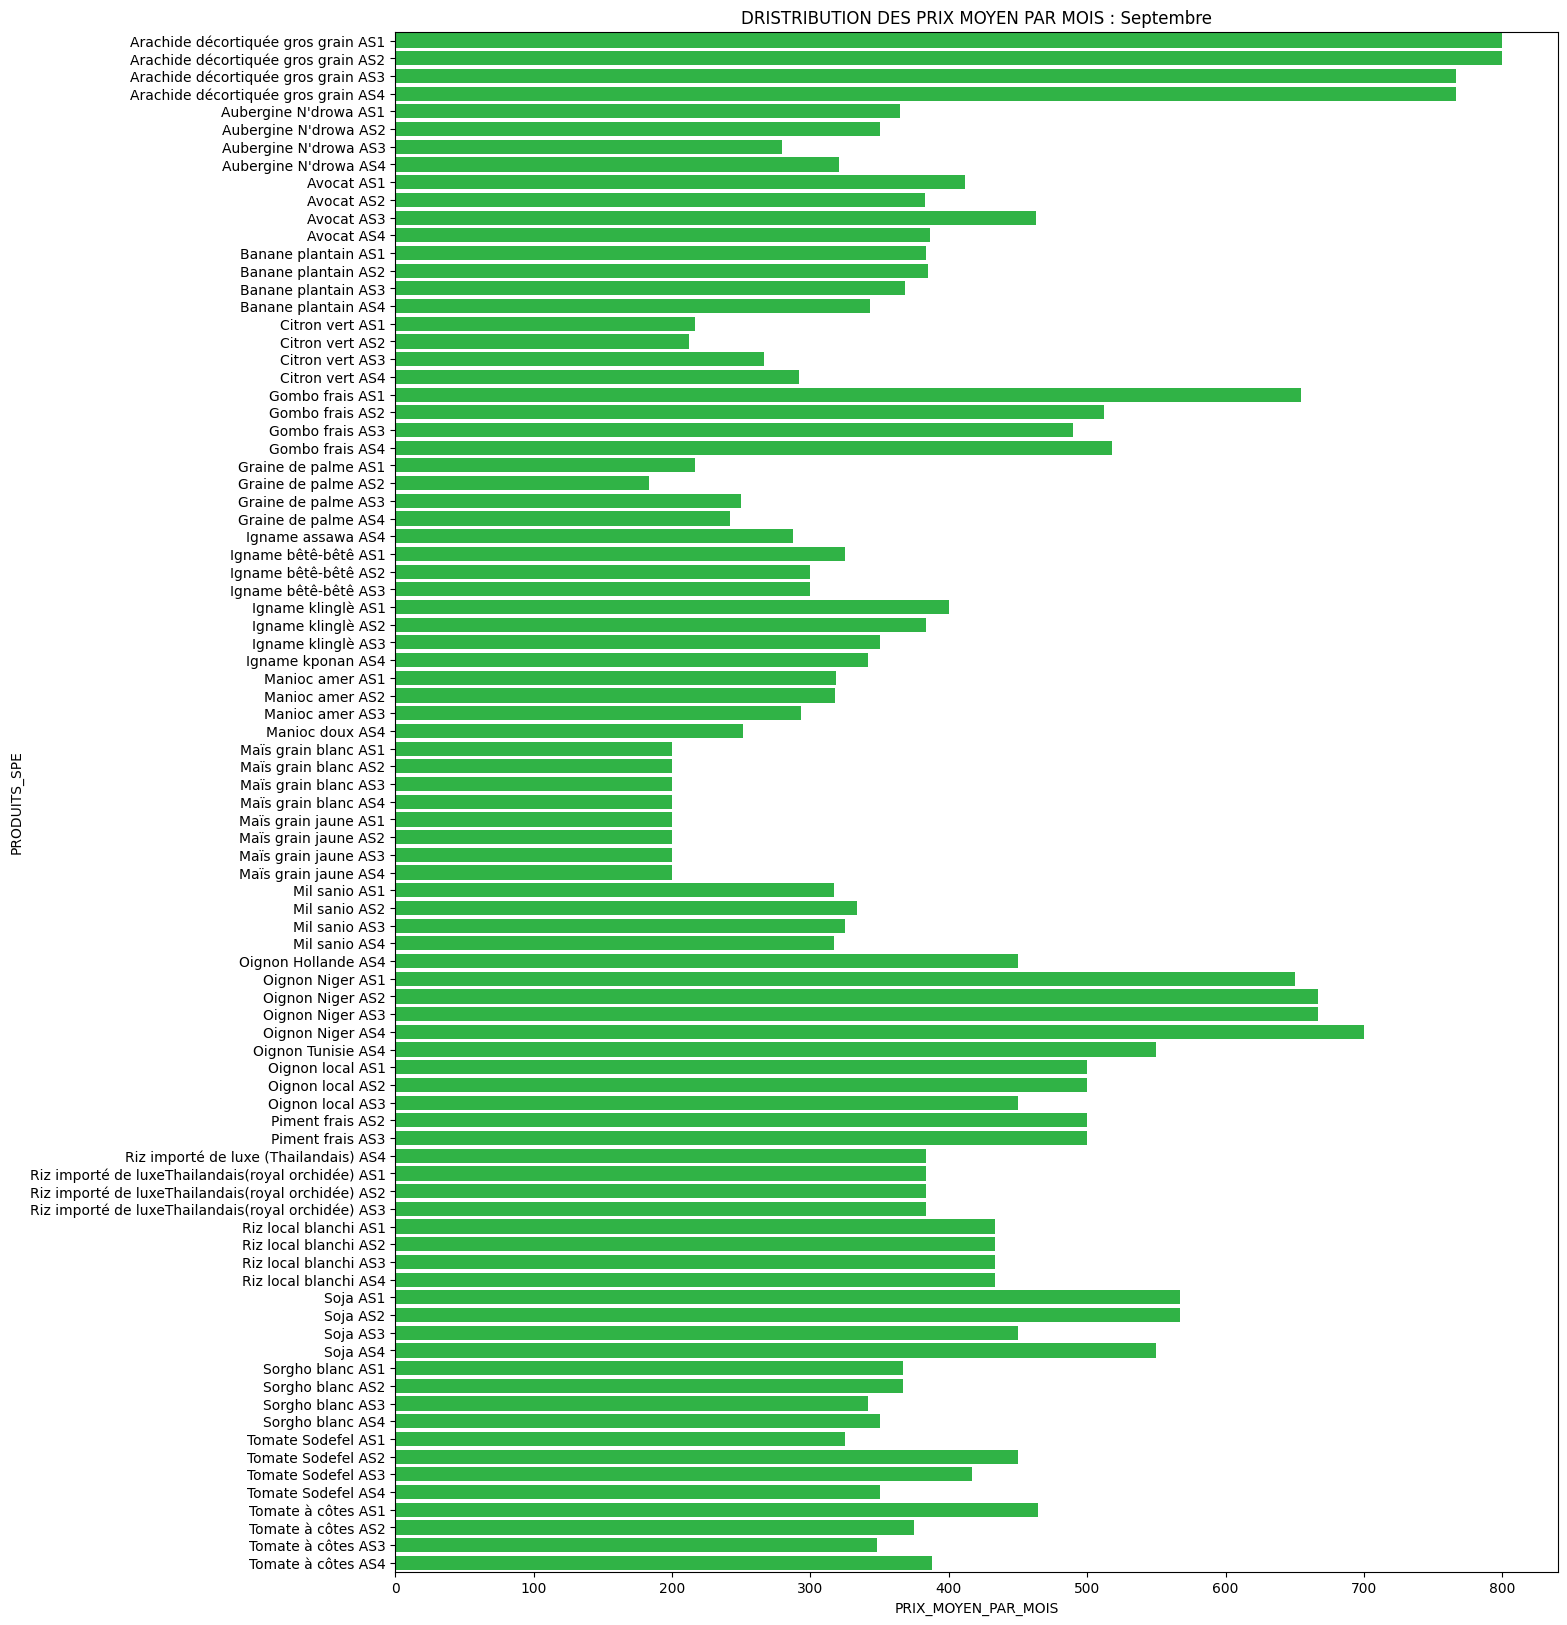

In [140]:
D1 = {}
for m in prix_moyen_par_mois["MOIS"].unique():
    dfm = prix_moyen_par_mois.loc[prix_moyen_par_mois["MOIS"]==m]
    D1[m] = dfm
colors = sns.color_palette("bright",len(prix_moyen_par_mois["MOIS"]))
for i, m in enumerate(prix_moyen_par_mois["MOIS"].unique()):
    plt.figure(figsize=(15,20))
    sns.barplot(D1[m],y="PRODUITS_SPE",x="PRIX_MOYEN_PAR_MOIS",color=colors[i])
    plt.title(f"DRISTRIBUTION DES PRIX MOYEN PAR MOIS : {m}")
    plt.show()

#### Representation croisée

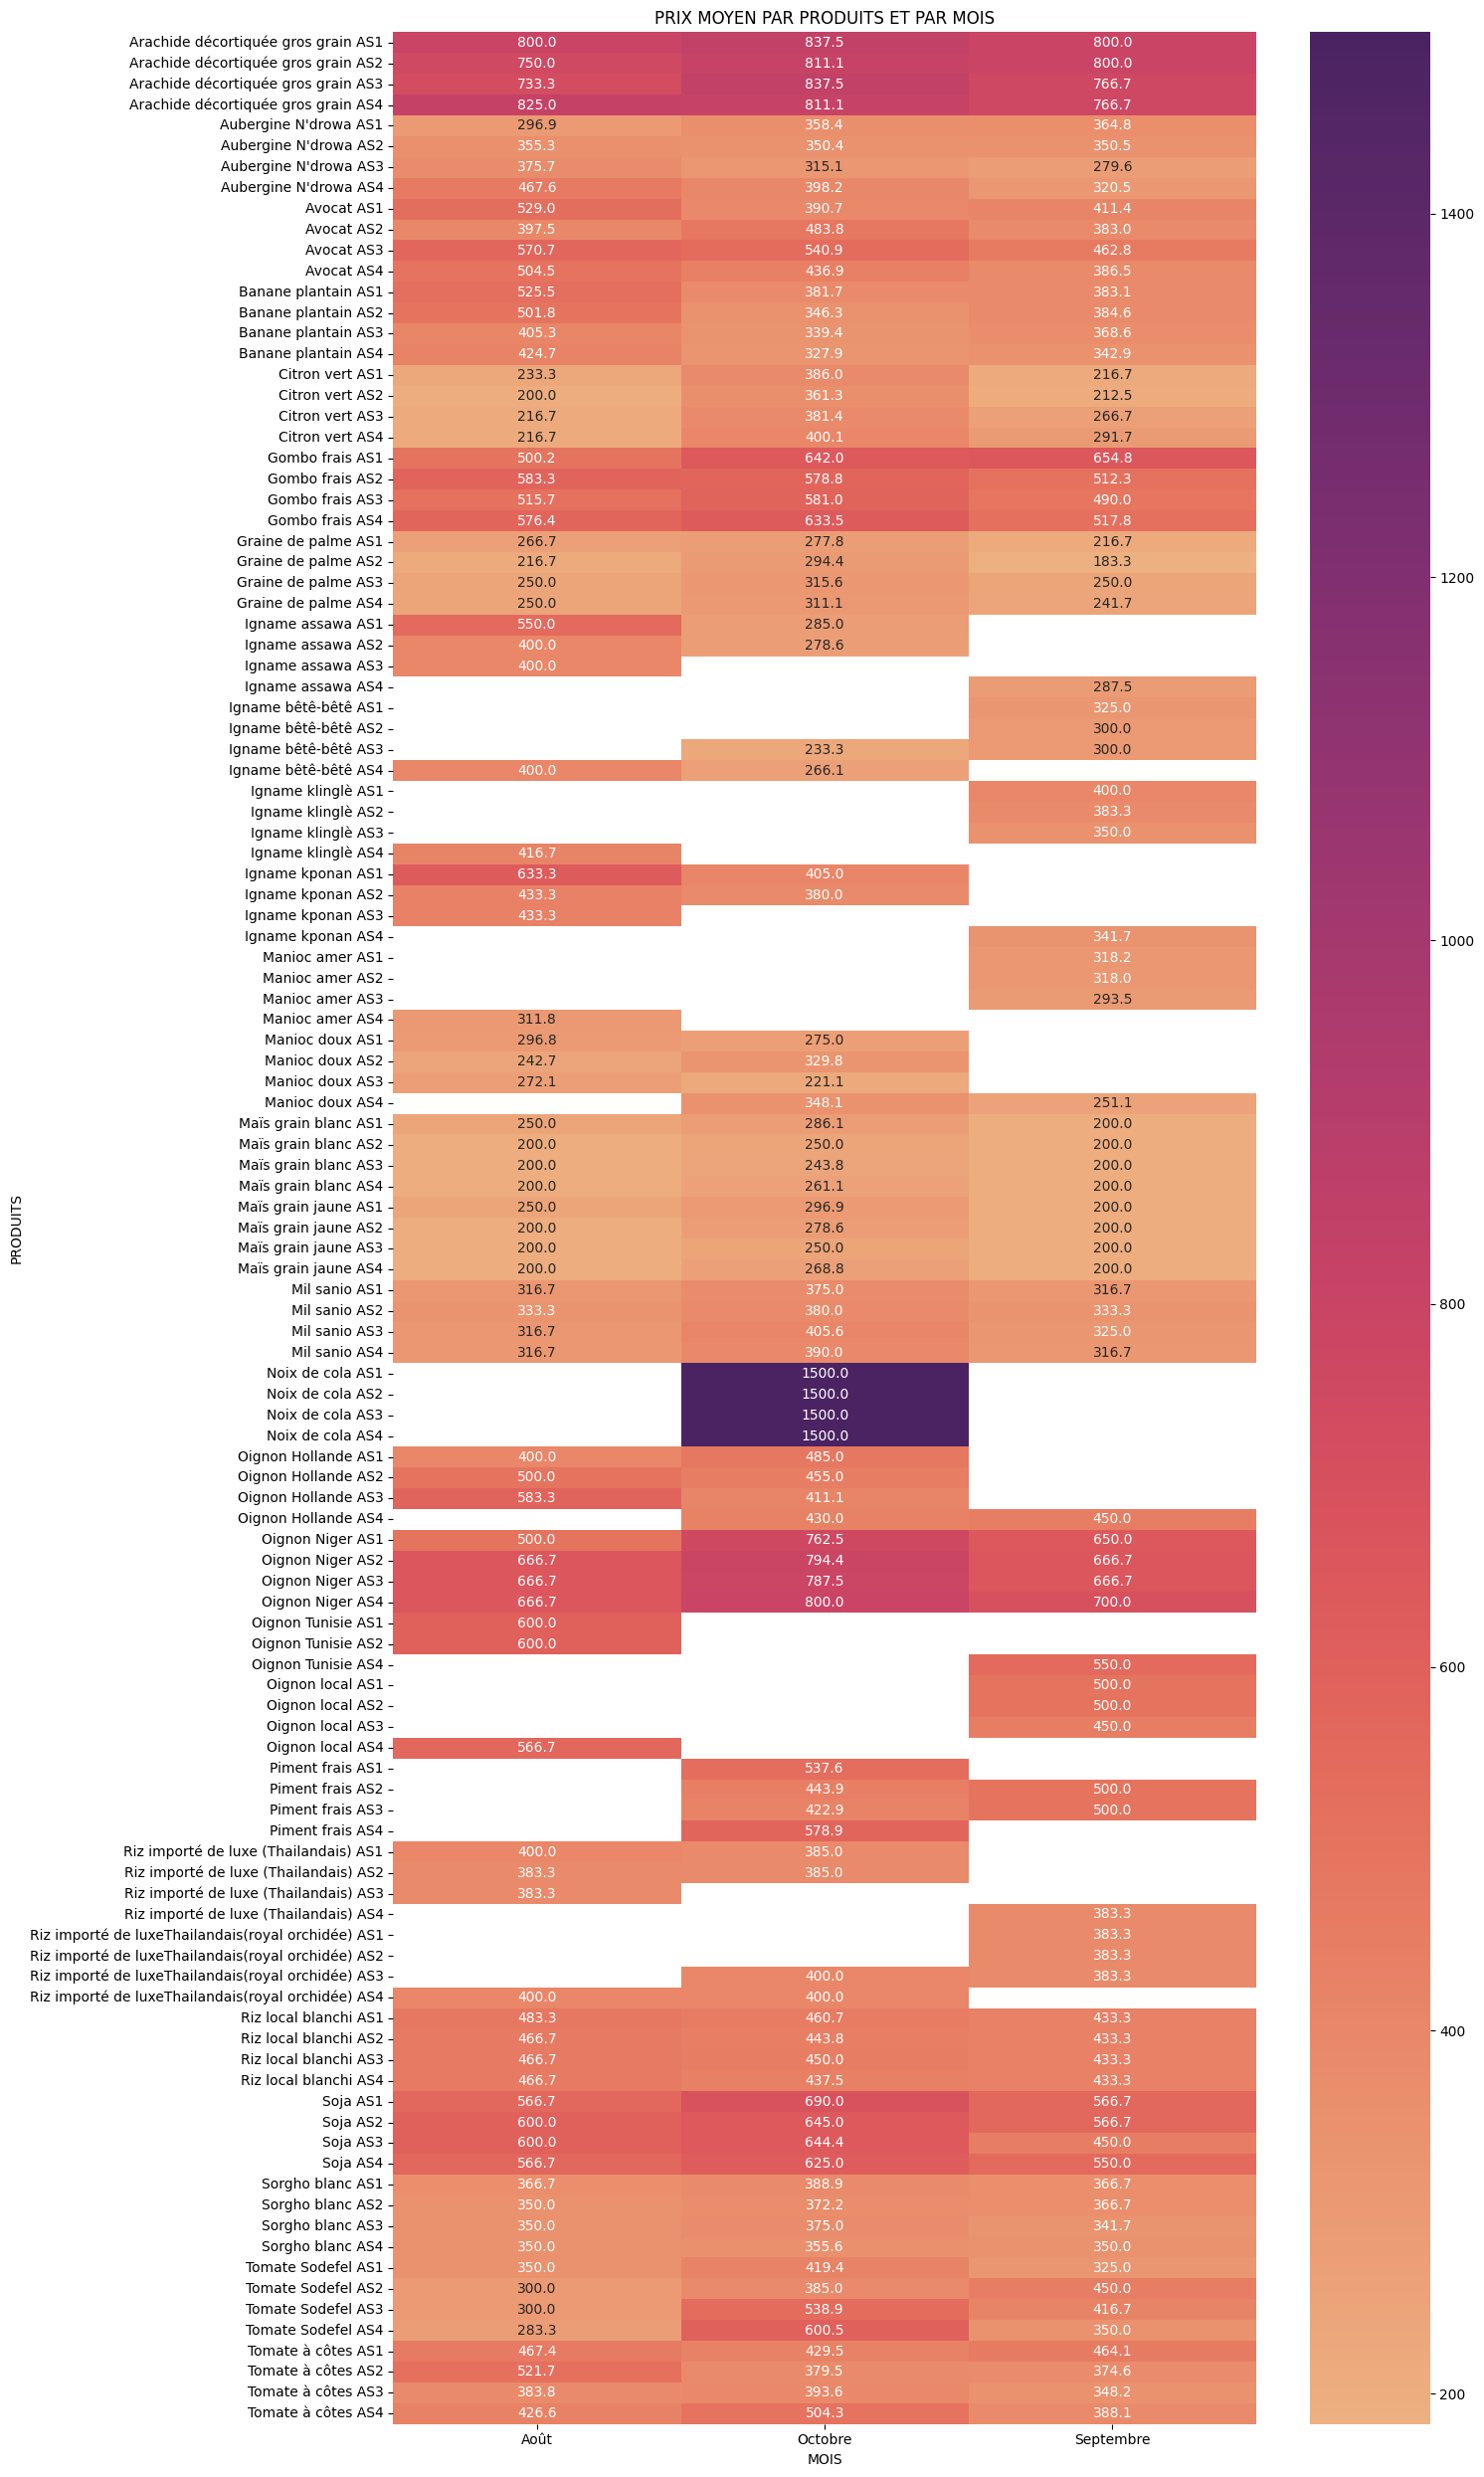

In [141]:
heatmap_mois = prix_moyen_par_mois.pivot_table(
    index= "PRODUITS_SPE",
    columns= "MOIS",
    values= "PRIX_MOYEN_PAR_MOIS"
)
plt.figure(figsize=(15,25))
sns.heatmap(heatmap_mois,annot=True,fmt=".1f",cmap="flare")
plt.xlabel("MOIS")
plt.ylabel("PRODUITS")
plt.title("PRIX MOYEN PAR PRODUITS ET PAR MOIS")
plt.tight_layout()
plt.show()

##### 3.a.2.1.3-Distribution des prix moyen en général

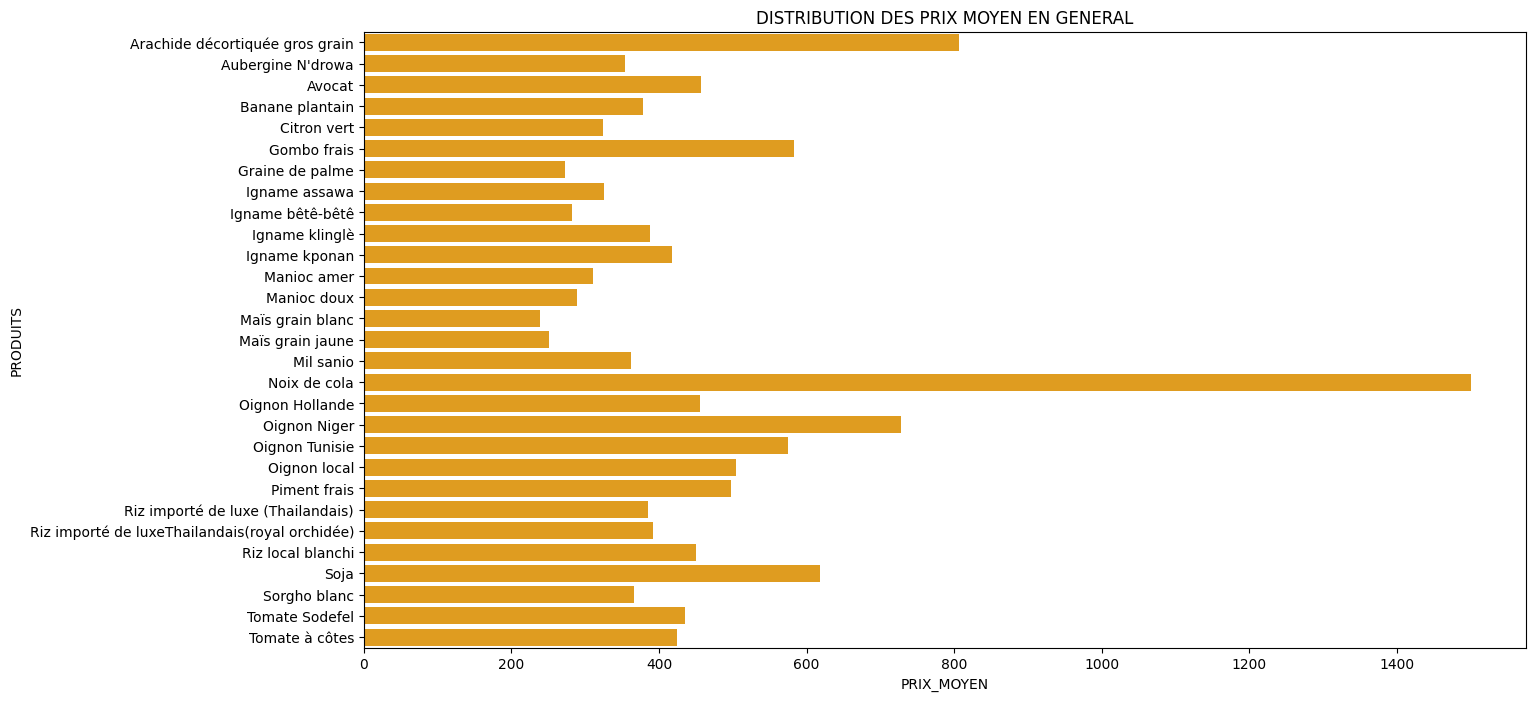

In [142]:
plt.figure(figsize=(15,8))
sns.barplot(prix_moyen_general,y="PRODUITS",x="PRIX_MOYEN",color="orange")
plt.title("DISTRIBUTION DES PRIX MOYEN EN GENERAL")
plt.show()

#### 3.a.2.2-Boite à moustache pour les prix des produits en général

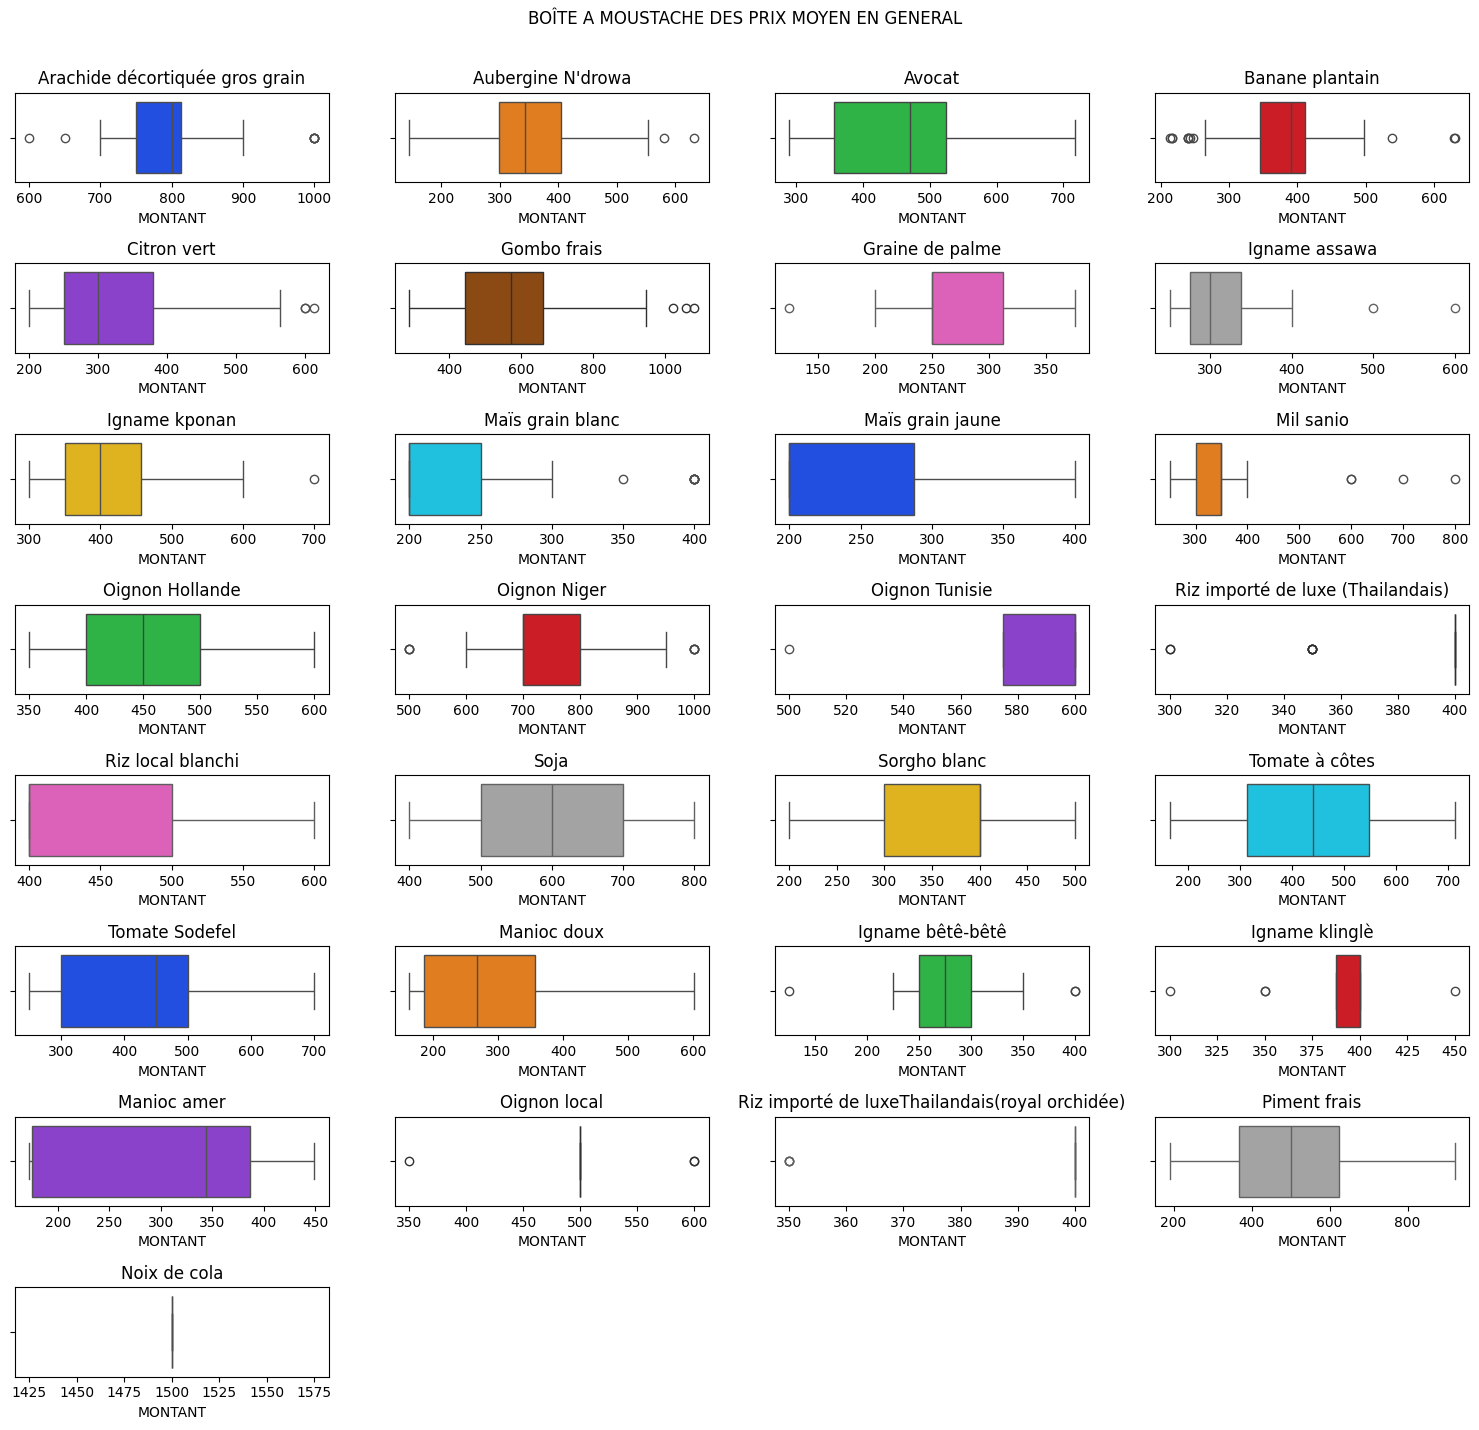

In [143]:
d_box_prod = {}
produit = df_prix_au_detail["PRODUITS"].unique()
for prod in produit:
    df_box_prod = df_prix_au_detail.loc[df_prix_au_detail["PRODUITS"]==prod]
    d_box_prod[prod]=df_box_prod
ncol_box = 4
ligne_box = math.ceil(len(produit)/ncol_box)
colors = sns.color_palette("bright", len(produit))
fig, axes = plt.subplots(nrows=ligne_box, ncols=ncol_box,figsize=(15,15), sharey=False)
axes = axes.flatten()
for i, prd in enumerate(produit):
    sns.boxplot(d_box_prod[prd],x="MONTANT",ax=axes[i],color=colors[i])
    axes[i].set_title(prd)
plt.tight_layout(rect=[0,0.03,1,0.95])
axes[31].remove()
axes[30].remove()
axes[29].remove()
fig.suptitle("BOÎTE A MOUSTACHE DES PRIX MOYEN EN GENERAL")
plt.show()

## IV-Quelques statistiques intéressantes

### 4.a-Détermination du mois qui était le plus chaud, comme on dit chez nous (ou la vie était la plus chère)

Comment déterminer le mois le plus cher ? Ici, on va tout simplement adopter une approche selon laquelle nous souhaitons faire nos courses, et la liste de nos courses correspond exactement à la liste de tous les produits vivriers présentés et concernés. Si cette course est effectuée intégralement une fois chaque mois, le mois le plus cher sera tout simplement celui où j’aurai dépensé le plus pour cette course.

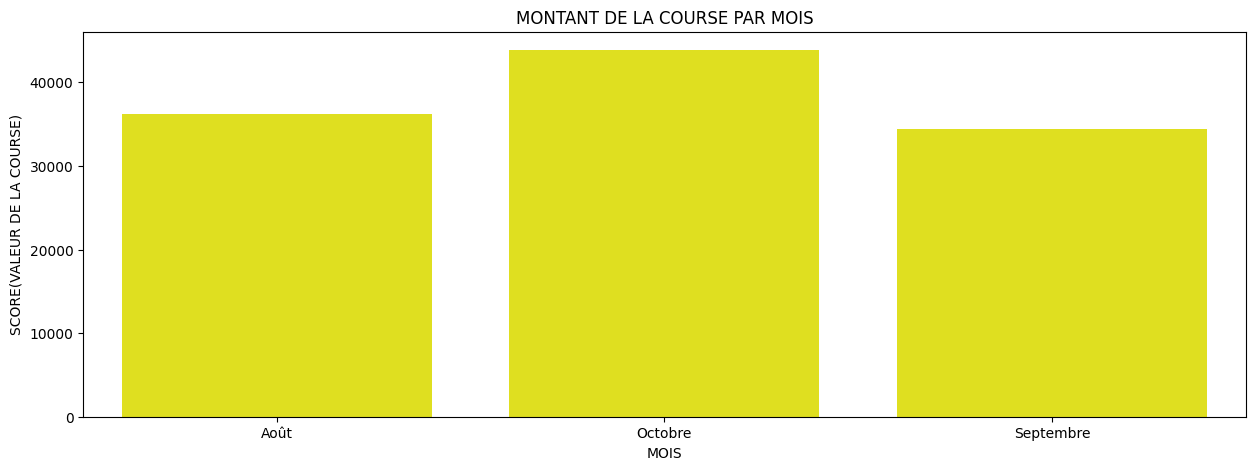

In [144]:
L0 = []
mois = prix_moyen_par_mois["MOIS"].unique()
for i, m in enumerate(mois):
    score_m = D1[m]
    L0.append(score_m["PRIX_MOYEN_PAR_MOIS"].sum())

mpc = pd.DataFrame({ "MOIS": mois,
                    "SCORE(VALEUR DE LA COURSE)": L0
})
plt.figure(figsize=(15,5))
sns.barplot(mpc,x="MOIS",y="SCORE(VALEUR DE LA COURSE)",color="yellow")
plt.title("MONTANT DE LA COURSE PAR MOIS")
plt.show()

On peut constater que, pour les prix au détail (en majorité subis par les consommateurs finaux), le mois le plus cher était celui d'octobre.

### 4.b-Détermination de la commune la moins chére 

Appliquer le même raisonnement ici serait l'idéal. Le problème, c'est qu'il y a certains produits qui ne sont pas présents dans les données de certaines communes. On doit donc se défendre avec le prix moyen dépensé pour un produit vivrier par commune.

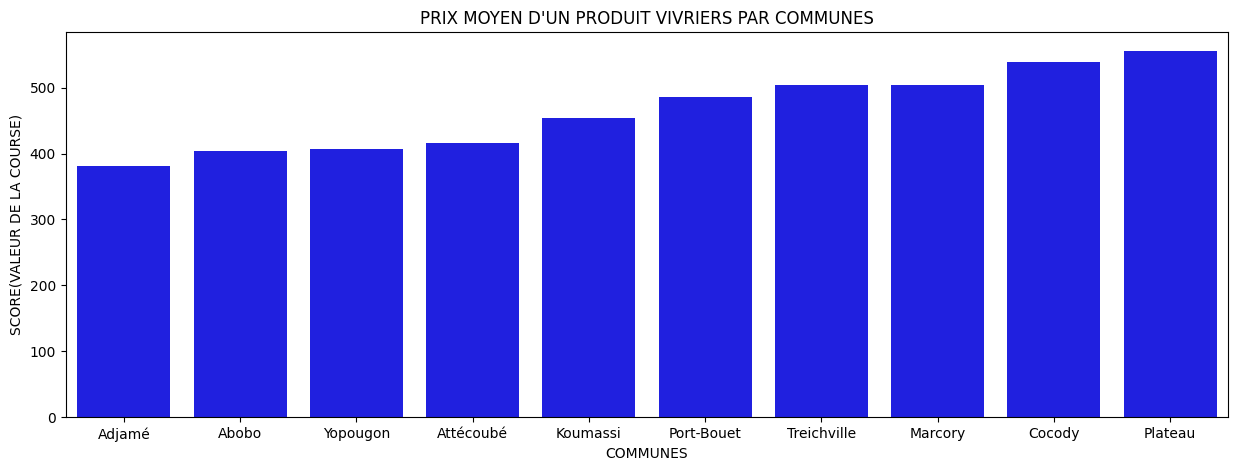

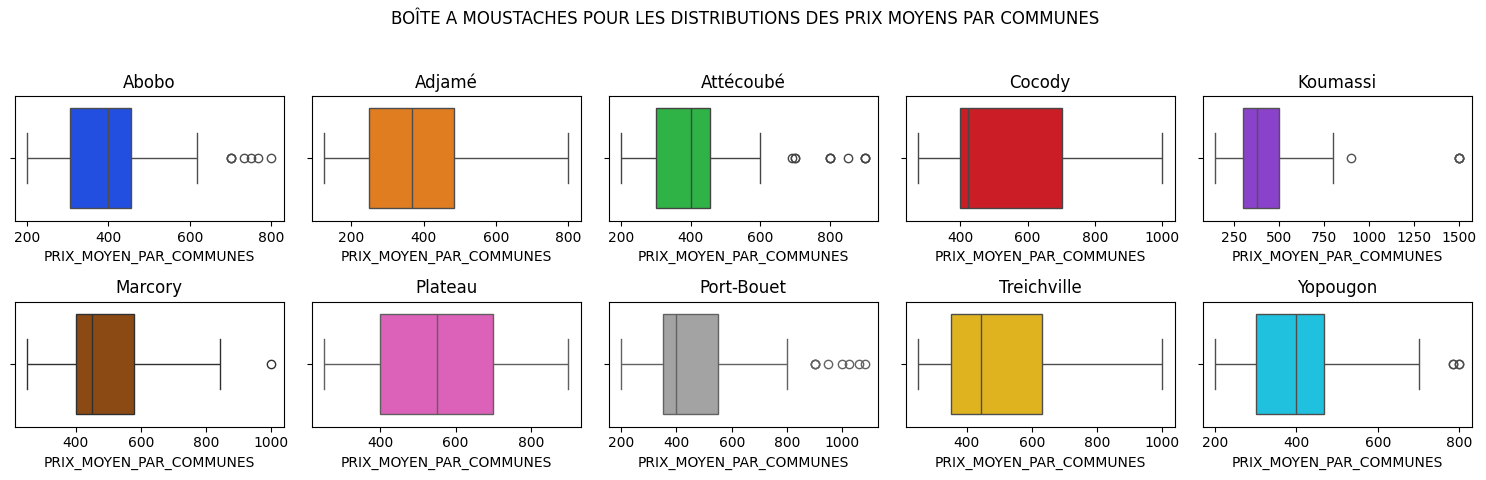

In [145]:
L01 = []
commune = prix_moyen_par_commune["COMMUNES"].unique()
for i, comm in enumerate(commune):
    score_m = D0[comm]
    L01.append(score_m["PRIX_MOYEN_PAR_COMMUNES"].mean())

cpc = pd.DataFrame({ "COMMUNES": commune,
                    "SCORE(VALEUR DE LA COURSE)": L01
})
cpc = cpc.sort_values(by="SCORE(VALEUR DE LA COURSE)", ascending=True)
plt.figure(figsize=(15,5))
sns.barplot(cpc,x="COMMUNES",y="SCORE(VALEUR DE LA COURSE)",color="blue")
plt.title("PRIX MOYEN D'UN PRODUIT VIVRIERS PAR COMMUNES")
plt.show()

fig, axes = plt.subplots(nrows=2,ncols=5,figsize=(15,5),sharey=True)
axes=axes.flatten()
colors = sns.color_palette("bright",10)
for i, comm in enumerate(commune):
    sns.boxplot(D0[comm],x="PRIX_MOYEN_PAR_COMMUNES",ax=axes[i],color=colors[i])
    axes[i].set_title(comm)
plt.suptitle("BOÎTE A MOUSTACHES POUR LES DISTRIBUTIONS DES PRIX MOYENS PAR COMMUNES")
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

Le vainqueur est donc la commune d'Ajamé, c'est là qu'en moyenne les prix sont les plus bas et donc là où la vie est la moins chère.
À l'opposé, la commune la plus chère est le Plateau (force aux habitants de cette commune).
Nb : On présente ici les boîtes à moustaches, mais en réalité, ce ne sont pas forcément les valeurs extrêmes qui nous intéressent. On pourrait dire que les valeurs extrêmes biaisent, dans une certaine mesure, les moyennes et donc les classements, peut-être.
Dans le cas précis où ce qui nous intéresse ce n'est pas  le prix moyen des produits vivriers par commune (en lui-même) mais, c’est surtout la cherté de la vie par commune qui nous importe. Nous ne cherchons pas à quantifier cette cherté, mais plutôt à obtenir une information sur l’ordre de cherté par commune.
Ainsi, les valeurs extrêmes représentent les écarts de certains prix par rapport aux autres (et cela pour chaque commune, comme illustré dans les boxplots). Elles nous permettent d’observer comment les prix se décalent dans certaines communes par rapport aux autres.
Leur présence dans la moyenne apporte ici une information précieuse sur la cherté de la vie dans son ensemble pour chaque commune, tout en tenant compte de leurs spécificités(entre autres, les décalages particuliers de tel prix pour tel produit).

### 4.c-Détermination de la marge commerciale

Dans cette section, nous allons déterminer la marge commerciale moyenne, c'est-à-dire le bénéfice réalisé par les commerçants après l'achat des produits en gros et leur revente au détail.

Détermination des prix moyens généraux pour les prix de gros

In [146]:
prix_moyen_general_gros = df_prix_en_gros.groupby(["PRODUITS"])["MONTANT"].agg(PRIX_MOYEN="mean",
                                                                          MEDIANE= "median",
                 PRIX_MAX = "max",
                 PRIX_MIN = "min"
                 ).reset_index()
prix_moyen_general_gros

PRODUITS   PRIX_MOYEN      MEDIANE  \
0                  Arachide décortiquée gros grain   679.575893   700.000000   
1                                Aubergine N'drowa   115.479998   100.000000   
2                                           Avocat   258.043478   216.666667   
3                                  Banane plantain   187.603324   169.047619   
4                                      Citron vert   231.182796   223.333333   
5                                      Gombo frais   312.195245   300.000000   
6                                  Graine de palme   208.305085   200.000000   
7                                    Igname assawa   250.000000   218.750000   
8                                 Igname bêtê-bêtê   217.857143   200.000000   
9                                   Igname klinglè   291.666667   300.000000   
10                                   Igname kponan   325.322581   300.000000   
11                                     Manioc amer    98.681052   110.416667   
12                                     Manioc doux   116.224054   118.333333   
13                                Maïs grain blanc   163.192090   150.000000   
14                                Maïs grain jaune   174.166667   160.000000   
15                                       Mil sanio   275.079365   250.000000   
16                                    Noix de cola  1000.000000  1000.000000   
17                                 Oignon Hollande   334.100000   320.000000   
18                                    Oignon Niger   585.878788   600.000000   
19                                  Oignon Tunisie   445.000000   420.000000   
20                                    Oignon local   380.000000   360.000000   
21                                    Piment frais   223.071970   183.333333   
22               Riz importé de luxe (Thailandais)   342.437276   360.000000   
23  Riz importé de luxeThailandais(royal orchidée)   360.000000   360.000000   
24                               Riz local blanchi   362.600000   350.000000   
25                                            Soja   502.620968   500.000000   
26                                    Sorgho blanc   262.110169   300.000000   
27                                  Tomate Sodefel   277.976190   250.000000   
28                                  Tomate à côtes   155.167823   153.846154   

       PRIX_MAX     PRIX_MIN  
0    875.000000   450.000000  
1    455.486542    50.000000  
2    500.000000   133.333333  
3    366.666667   100.000000  
4    500.000000   120.000000  
5    635.080645   150.000000  
6    350.000000   100.000000  
7    500.000000   175.000000  
8    300.000000   150.000000  
9    350.000000   250.000000  
10   600.000000   250.000000  
11   125.000000     0.125000  
12   160.000000    83.333333  
13   400.000000   104.166667  
14   400.000000   104.166667  
15   700.000000   200.000000  
16  1000.000000  1000.000000  
17   500.000000   200.000000  
18  1000.000000   358.333333  
19   540.000000   400.000000  
20   480.000000   300.000000  
21   871.212121    43.333333  
22   380.000000   200.000000  
23   380.000000   320.000000  
24   400.000000   320.000000  
25   800.000000   300.000000  
26   400.000000    23.000000  
27   600.000000   125.000000  
28   741.758242    76.923077

In [147]:
df_marge=pd.DataFrame({"PRODUITS": produit,
                      "PRIX MOYEN EN GROS": prix_moyen_general_gros["PRIX_MOYEN"],
                      "PRIX MOYEN AU DETAILS": prix_moyen_general["PRIX_MOYEN"],
                      "MARGE COMMERCIALE MOYENNE EN %": ((prix_moyen_general["PRIX_MOYEN"] - prix_moyen_general_gros["PRIX_MOYEN"] )*(100) /prix_moyen_general["PRIX_MOYEN"]).round(2)     
})
df_marge = df_marge.sort_values("MARGE COMMERCIALE MOYENNE EN %",ascending=False,ignore_index=True)
df_marge

PRODUITS  PRIX MOYEN EN GROS  \
0                                        Mil sanio           98.681052   
1                                Aubergine N'drowa          115.479998   
2                                     Noix de cola          155.167823   
3                                  Oignon Hollande          116.224054   
4                                      Manioc doux          223.071970   
5                                  Banane plantain          187.603324   
6                                      Gombo frais          312.195245   
7                                           Avocat          258.043478   
8                                     Piment frais          277.976190   
9                                Riz local blanchi         1000.000000   
10                                    Oignon Niger          163.192090   
11                                  Oignon Tunisie          174.166667   
12                                     Citron vert          231.182796   
13  Riz importé de luxeThailandais(royal orchidée)          262.110169   
14                                            Soja          334.100000   
15                                Maïs grain blanc          291.666667   
16                                  Tomate Sodefel          380.000000   
17               Riz importé de luxe (Thailandais)          275.079365   
18                                 Graine de palme          208.305085   
19                                   Igname assawa          250.000000   
20                                   Igname kponan          217.857143   
21                                  Tomate à côtes          445.000000   
22                                Maïs grain jaune          325.322581   
23                                    Sorgho blanc          585.878788   
24                                     Manioc amer          362.600000   
25                                    Oignon local          502.620968   
26                 Arachide décortiquée gros grain          679.575893   
27                                Igname bêtê-bêtê          342.437276   
28                                  Igname klinglè          360.000000   

    PRIX MOYEN AU DETAILS  MARGE COMMERCIALE MOYENNE EN %  
0              310.368100                           68.21  
1              354.520293                           67.43  
2              424.440315                           63.44  
3              288.659709                           59.74  
4              498.148770                           55.22  
5              378.722439                           50.46  
6              582.870893                           46.44  
7              456.585125                           43.48  
8              435.500000                           36.17  
9             1500.000000                           33.33  
10             238.559322                           31.59  
11             250.531915                           30.48  
12             324.309869                           28.72  
13             365.677966                           28.32  
14             454.901961                           26.56  
15             387.500000                           24.73  
16             504.166667                           24.63  
17             362.301587                           24.07  
18             272.881356                           23.66  
19             325.000000                           23.08  
20             281.547619                           22.62  
21             575.000000                           22.61  
22             417.968750                           22.17  
23             728.070175                           19.53  
24             449.537037                           19.34  
25             618.548387                           18.74  
26             806.250000                           15.71  
27             385.483871                           11.17  
28             392.500000                            8.28

### 4.c-Top 5 des  produits le plus rentables en moyenne

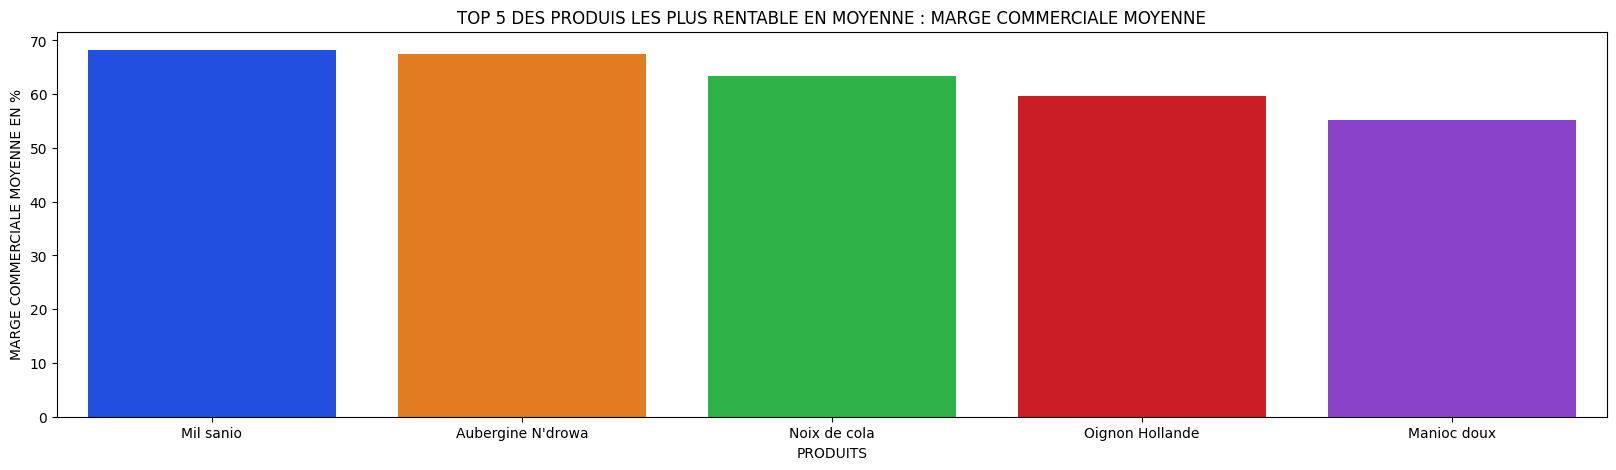

In [148]:
top5 = df_marge.iloc[0:5,0:]
plt.figure(figsize=(20,5))
pal = sns.color_palette("bright",5)
sns.barplot(top5,x="PRODUITS",y="MARGE COMMERCIALE MOYENNE EN %",hue="PRODUITS",palette=pal)
plt.title("TOP 5 DES PRODUIS LES PLUS RENTABLE EN MOYENNE : MARGE COMMERCIALE MOYENNE")
plt.show()

## Conclusion

Nous voici à la fin de ce notebook, non exhaustif (comme annoncé). Nous avons présenté des méthodes de manipulation des données, présenté la détermination de quelques statistiques et de quelques visualisations (fixes et générées), où nous avons fait de petits classements en fonction des mois et des communes. Merci pour vôtre attention et à bientôt.